# Data Loading

## Importing all libraries

In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_excel("Online Retail.xlsx")

In [3]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [5]:
data.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [6]:
data["CustomerID"] = data["CustomerID"].fillna(0)
data.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     541909
Country        541909
dtype: int64

In [7]:
data = data[-data["InvoiceNo"].astype('str').str.contains("C")]

In [8]:
data[["Country","InvoiceNo"]].groupby("Country").count().sort_values("InvoiceNo", ascending=False)

InvoiceNo
Country                        
United Kingdom           487622
Germany                    9042
France                     8408
EIRE                       7894
Spain                      2485
Netherlands                2363
Belgium                    2031
Switzerland                1967
Portugal                   1501
Australia                  1185
Norway                     1072
Italy                       758
Channel Islands             748
Finland                     685
Cyprus                      614
Sweden                      451
Unspecified                 446
Austria                     398
Denmark                     380
Poland                      330
Japan                       321
Israel                      295
Hong Kong                   284
Singapore                   222
Iceland                     182
USA                         179
Canada                      151
Greece                      145
Malta                       112
United Arab Emirates         68
European Community           60
RSA                          58
Lebanon                      45
Lithuania                    35
Brazil                       32
Czech Republic               25
Bahrain                      18
Saudi Arabia                  9

In [9]:
all_dates = data["InvoiceDate"].apply(lambda x: x.date()).unique()
all_dates

array([datetime.date(2010, 12, 1), datetime.date(2010, 12, 2),
       datetime.date(2010, 12, 3), datetime.date(2010, 12, 5),
       datetime.date(2010, 12, 6), datetime.date(2010, 12, 7),
       datetime.date(2010, 12, 8), datetime.date(2010, 12, 9),
       datetime.date(2010, 12, 10), datetime.date(2010, 12, 12),
       datetime.date(2010, 12, 13), datetime.date(2010, 12, 14),
       datetime.date(2010, 12, 15), datetime.date(2010, 12, 16),
       datetime.date(2010, 12, 17), datetime.date(2010, 12, 19),
       datetime.date(2010, 12, 20), datetime.date(2010, 12, 21),
       datetime.date(2010, 12, 22), datetime.date(2010, 12, 23),
       datetime.date(2011, 1, 4), datetime.date(2011, 1, 5),
       datetime.date(2011, 1, 6), datetime.date(2011, 1, 7),
       datetime.date(2011, 1, 9), datetime.date(2011, 1, 10),
       datetime.date(2011, 1, 11), datetime.date(2011, 1, 12),
       datetime.date(2011, 1, 13), datetime.date(2011, 1, 14),
       datetime.date(2011, 1, 16), datetime.date

In [10]:
all_dates[-1] - all_dates[0]

datetime.timedelta(days=373)

In [11]:
all_dates.shape

(305,)

In [12]:
stockcodes = data["StockCode"].unique()
stockcodes.shape

(4059,)

In [13]:
Descr = data["Description"].unique()
Descr.shape

(4208,)

In [14]:
data["Invoice_Date"] = data["InvoiceDate"].apply(lambda x: x.date())
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Invoice_Date  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   2010-12-01  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   2010-12-01  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01

In [15]:
CDI = data[["Country","Description","Invoice_Date"]].groupby(["Country","Description","Invoice_Date"]).count().reset_index()
CDI

Country                    Description Invoice_Date
0         Australia              DOLLY GIRL BEAKER   2011-08-18
1         Australia    I LOVE LONDON MINI BACKPACK   2011-09-28
2         Australia         10 COLOUR SPACEBOY PEN   2011-06-15
3         Australia  12 PENCIL SMALL TUBE WOODLAND   2011-02-15
4         Australia      12 PENCILS TALL TUBE POSY   2011-03-24
...             ...                            ...          ...
304803  Unspecified           WRAP POPPIES  DESIGN   2011-05-10
304804  Unspecified          WRAP SUKI AND FRIENDS   2011-05-10
304805  Unspecified    WRAP VINTAGE PETALS  DESIGN   2011-05-10
304806  Unspecified               WRAP WEDDING DAY   2011-07-14
304807  Unspecified    ZINC METAL HEART DECORATION   2011-07-28

[304808 rows x 3 columns]

In [16]:
CDI_new = CDI.groupby(["Country","Description"]).count().sort_values("Invoice_Date", ascending=False).reset_index()
CDI_new

Country                         Description  Invoice_Date
0      United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER           304
1      United Kingdom            REGENCY CAKESTAND 3 TIER           301
2      United Kingdom             JUMBO BAG RED RETROSPOT           301
3      United Kingdom       ASSORTED COLOUR BIRD ORNAMENT           298
4      United Kingdom     NATURAL SLATE HEART CHALKBOARD            296
...               ...                                 ...           ...
20126          Israel       CUPBOARD 3 DRAWER MA CAMPAGNE             1
20127          Israel           DOLLY GIRL CHILDRENS BOWL             1
20128          Israel      DRAWER KNOB CRACKLE GLAZE BLUE             1
20129          Israel            EMERGENCY FIRST AID TIN              1
20130     Unspecified         ZINC METAL HEART DECORATION             1

[20131 rows x 3 columns]

In [17]:
Valid_Products = list(CDI_new[CDI_new["Invoice_Date"]>288]["Description"])
Valid_Products

['WHITE HANGING HEART T-LIGHT HOLDER',
 'REGENCY CAKESTAND 3 TIER',
 'JUMBO BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'NATURAL SLATE HEART CHALKBOARD ',
 'LUNCH BAG RED RETROSPOT',
 'PACK OF 72 RETROSPOT CAKE CASES',
 'WOODEN PICTURE FRAME WHITE FINISH',
 'LUNCH BAG CARS BLUE',
 'RECIPE BOX PANTRY YELLOW DESIGN',
 'LUNCH BAG  BLACK SKULL.',
 'PARTY BUNTING',
 'LUNCH BAG PINK POLKADOT',
 'JAM MAKING SET WITH JARS',
 'ALARM CLOCK BAKELIKE RED ']

In [18]:
Valid_data = data[(data["Description"].apply(lambda x: x in Valid_Products)) & (data["Country"] == "United Kingdom") ]

In [19]:
Valid_data.sort_values(["Description","Invoice_Date"], ascending = [False,True]).head(20)

InvoiceNo StockCode                        Description  Quantity  \
59      536373     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
76      536375     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
289     536396     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
426     536406     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
3122    536600     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
3201    536609     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
3233    536612     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
3434    536628     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
3452    536630     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
3817    536685     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
3832    536690     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
4172    536750     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
4193    536752     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
4517    536787     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
4536    536790     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
5019    536837     82482  WOODEN PICTURE FRAME WHITE FINISH         6   
6046    536876     82482  WOODEN PICTURE FRAME WHITE FINISH         1   
7585    537046     82482  WOODEN PICTURE FRAME WHITE FINISH         1   
7798    537055     82482  WOODEN PICTURE FRAME WHITE FINISH        12   
8034    537111     82482  WOODEN PICTURE FRAME WHITE FINISH         2   

             InvoiceDate  UnitPrice  CustomerID         Country Invoice_Date  
59   2010-12-01 09:02:00       2.10     17850.0  United Kingdom   2010-12-01  
76   2010-12-01 09:32:00       2.10     17850.0  United Kingdom   2010-12-01  
289  2010-12-01 10:51:00       2.10     17850.0  United Kingdom   2010-12-01  
426  2010-12-01 11:33:00       2.10     17850.0  United Kingdom   2010-12-01  
3122 2010-12-02 08:32:00       2.10     17850.0  United Kingdom   2010-12-02  
3201 2010-12-02 09:41:00       2.10     17850.0  United Kingdom   2010-12-02  
3233 2010-12-02 09:44:00       2.10     17850.0  United Kingdom   2010-12-02  
3434 2010-12-02 10:54:00       2.10     17850.0  United Kingdom   2010-12-02  
3452 2010-12-02 10:56:00       2.10     17850.0  United Kingdom   2010-12-02  
3817 2010-12-02 12:23:00       2.10     17850.0  United Kingdom   2010-12-02  
3832 2010-12-02 12:25:00       2.10     17850.0  United Kingdom   2010-12-02  
4172 2010-12-02 14:04:00       2.10     17850.0  United Kingdom   2010-12-02  
4193 2010-12-02 14:06:00       2.10     17850.0  United Kingdom   2010-12-02  
4517 2010-12-02 15:24:00       2.10     17850.0  United Kingdom   2010-12-02  
4536 2010-12-02 15:26:00       2.10     17850.0  United Kingdom   2010-12-02  
5019 2010-12-02 18:15:00       2.55     14395.0  United Kingdom   2010-12-02  
6046 2010-12-03 11:36:00       5.06         0.0  United Kingdom   2010-12-03  
7585 2010-12-05 10:58:00       2.55     18109.0  United Kingdom   2010-12-05  
7798 2010-12-05 11:45:00       2.55     16814.0  United Kingdom   2010-12-05  
8034 2010-12-05 12:08:00       2.55     14810.0  United Kingdom   2010-12-05

In [20]:
TS_data = Valid_data[["Description","Invoice_Date","Quantity"]].groupby(["Description","Invoice_Date"]).sum("Quantity").reset_index()

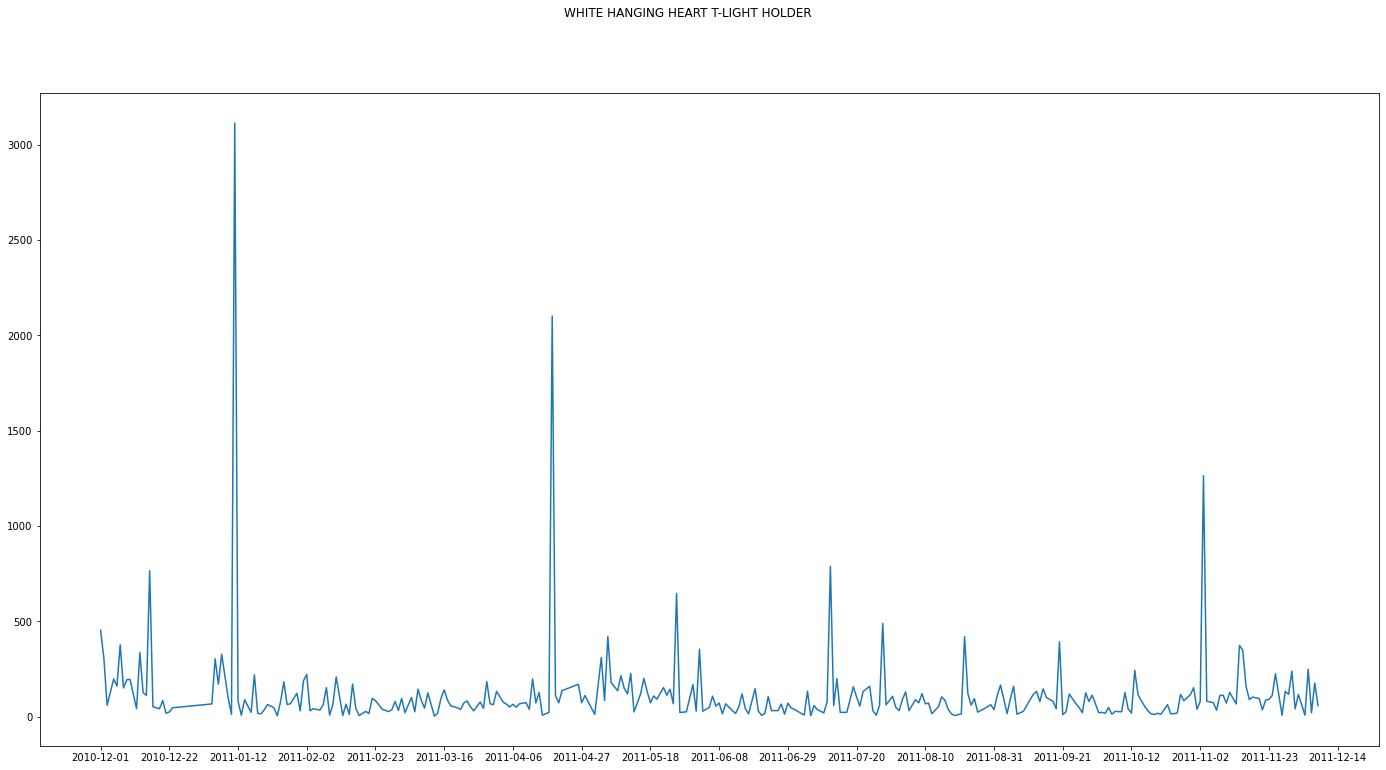

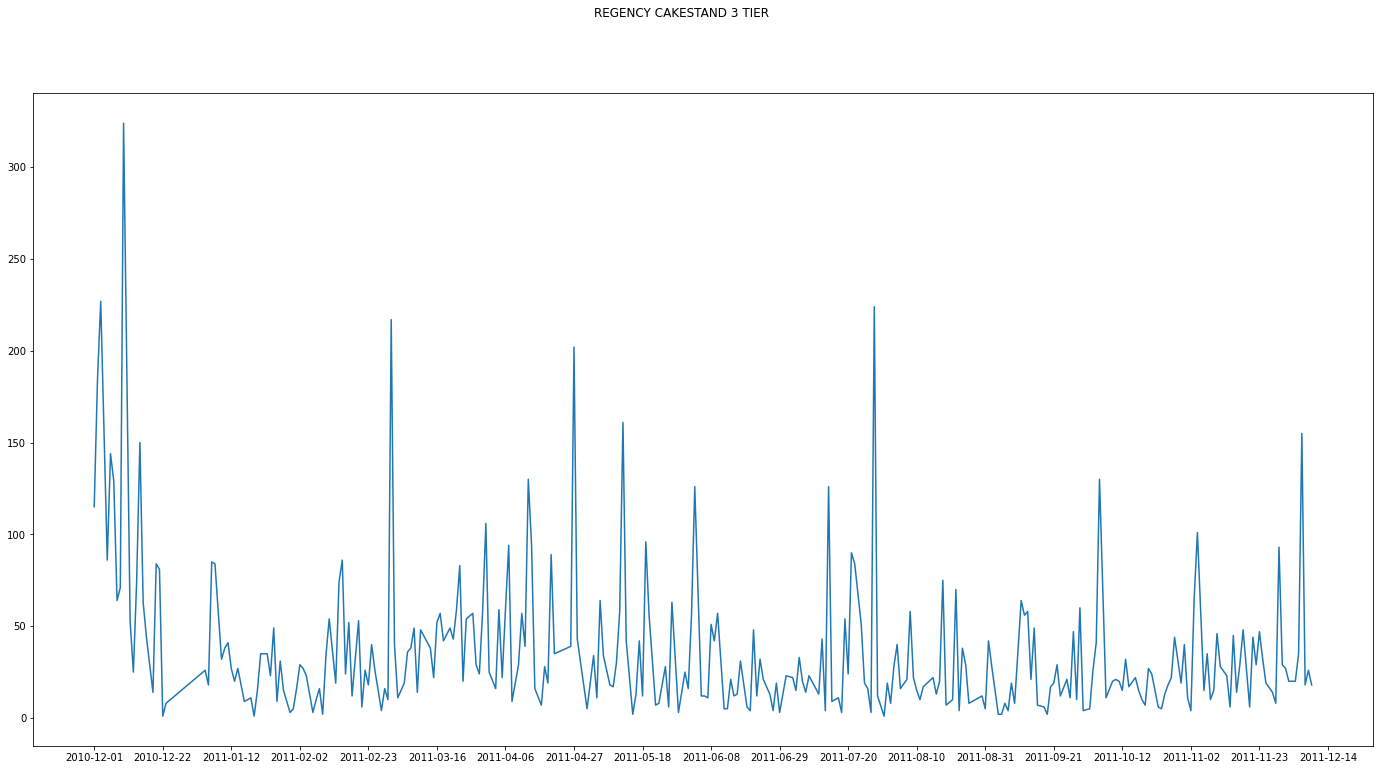

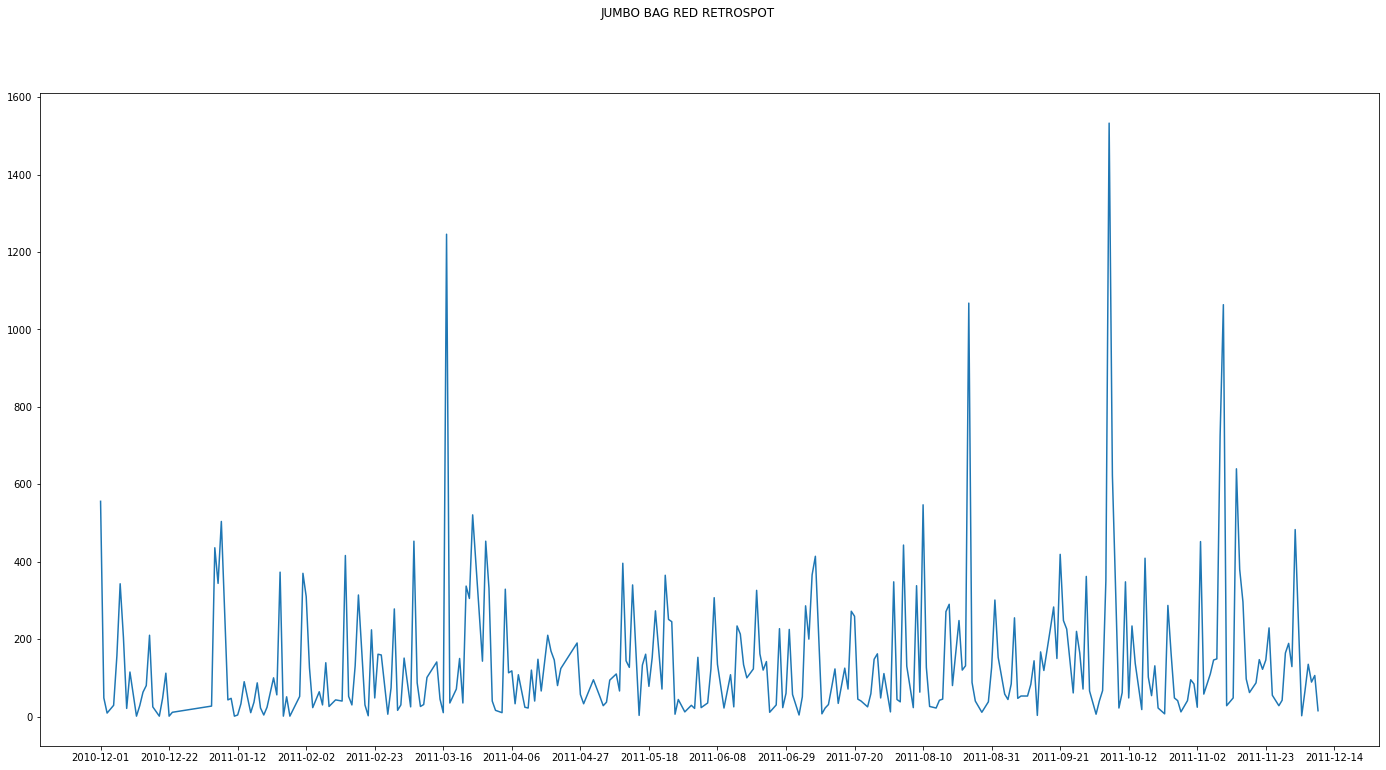

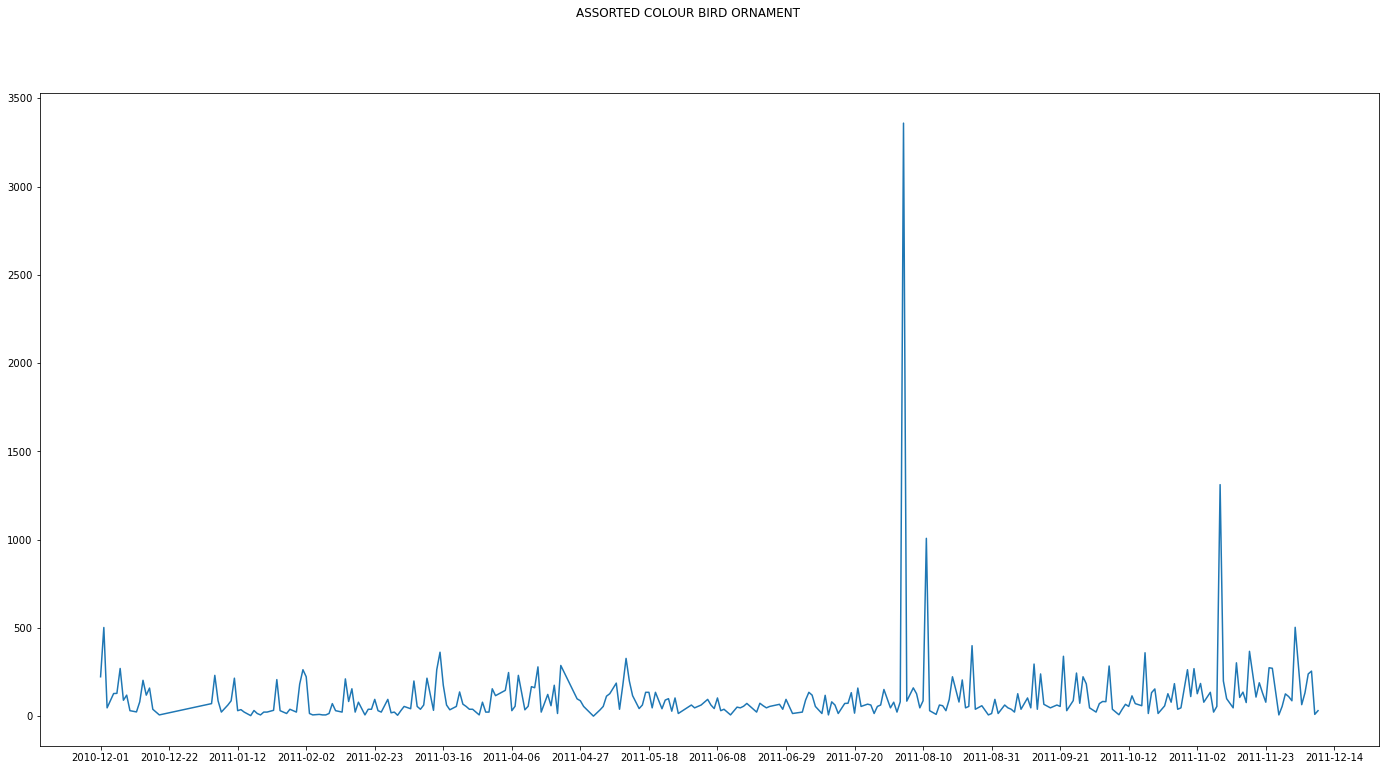

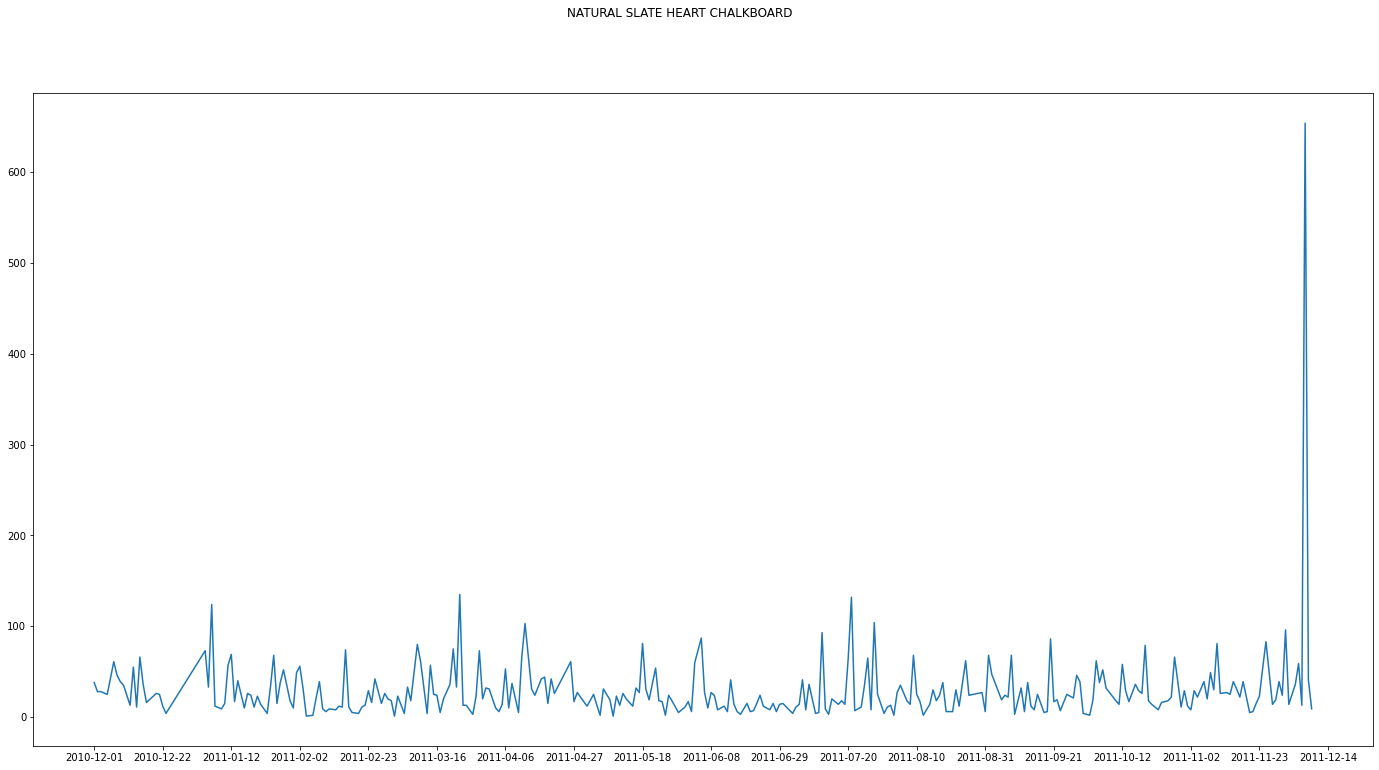

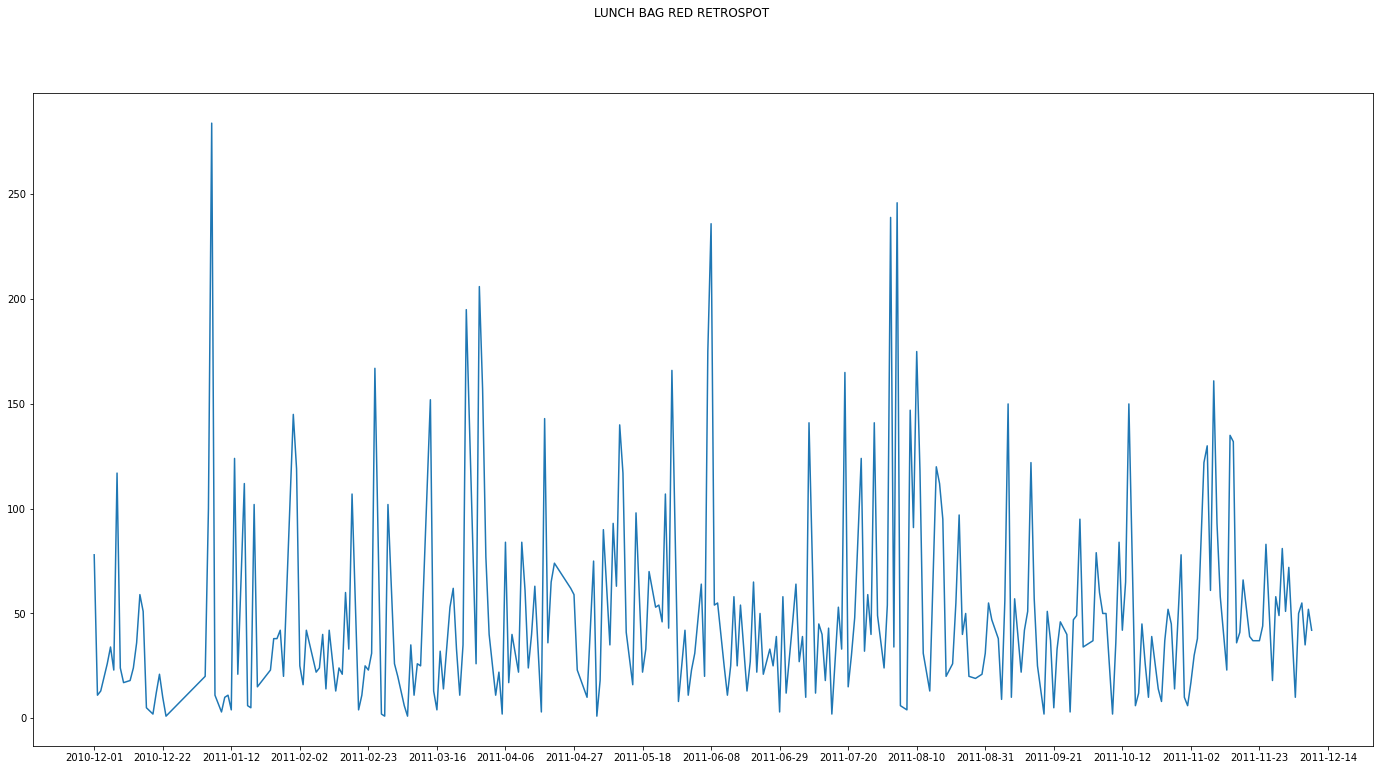

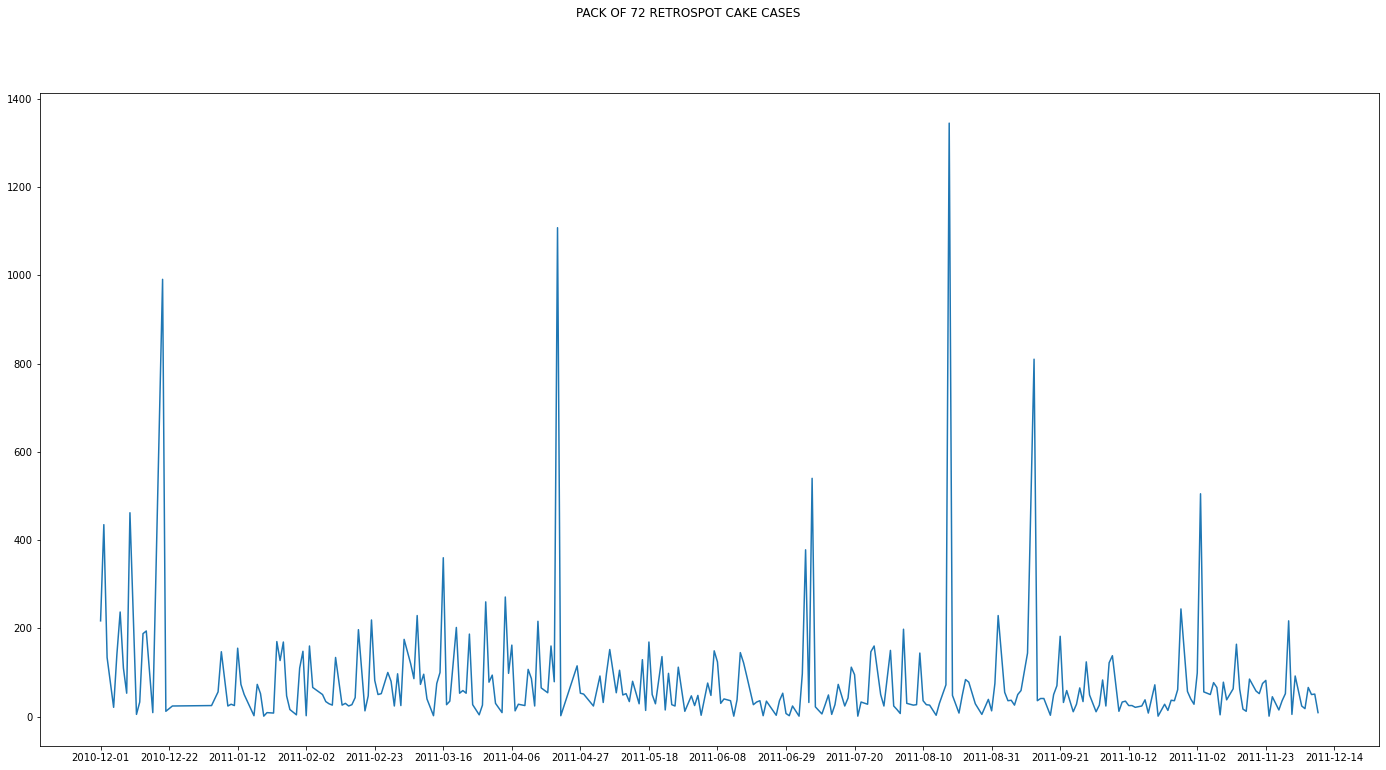

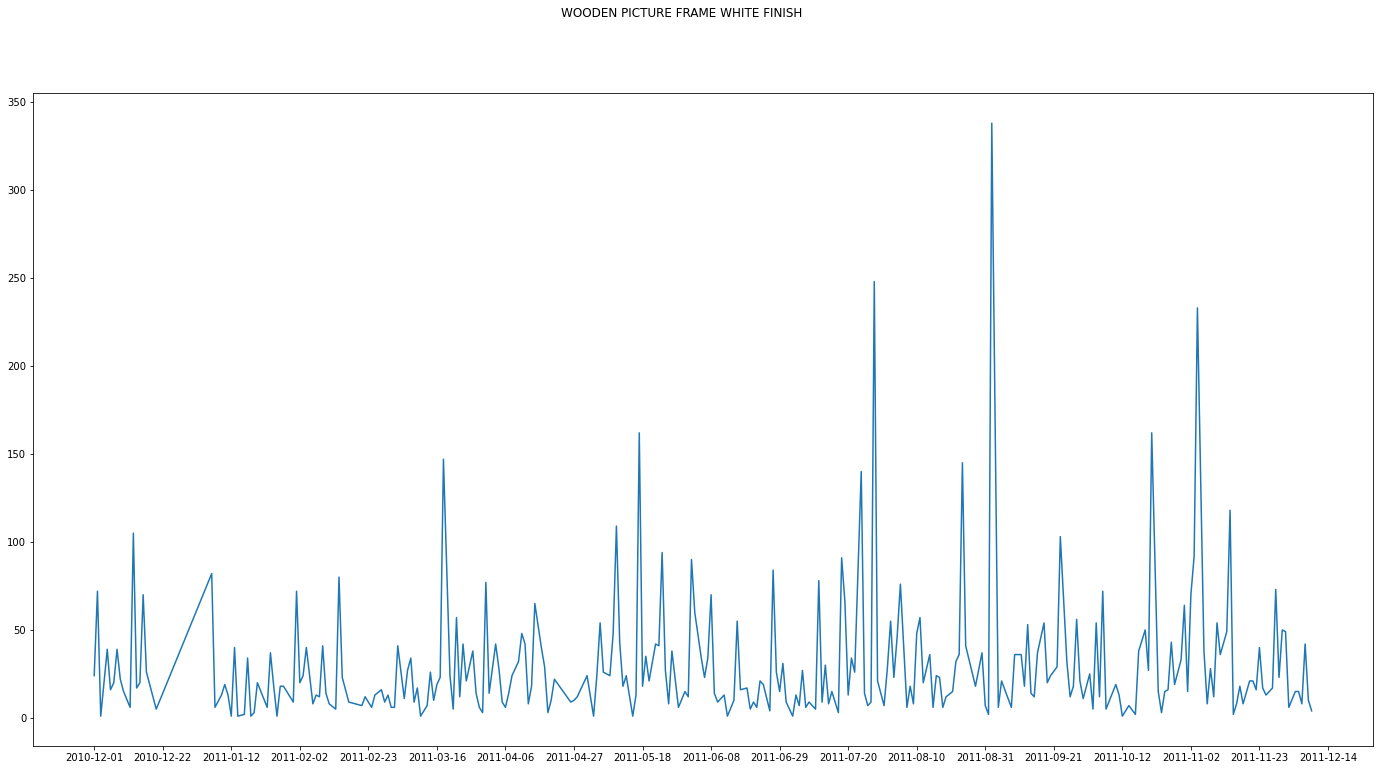

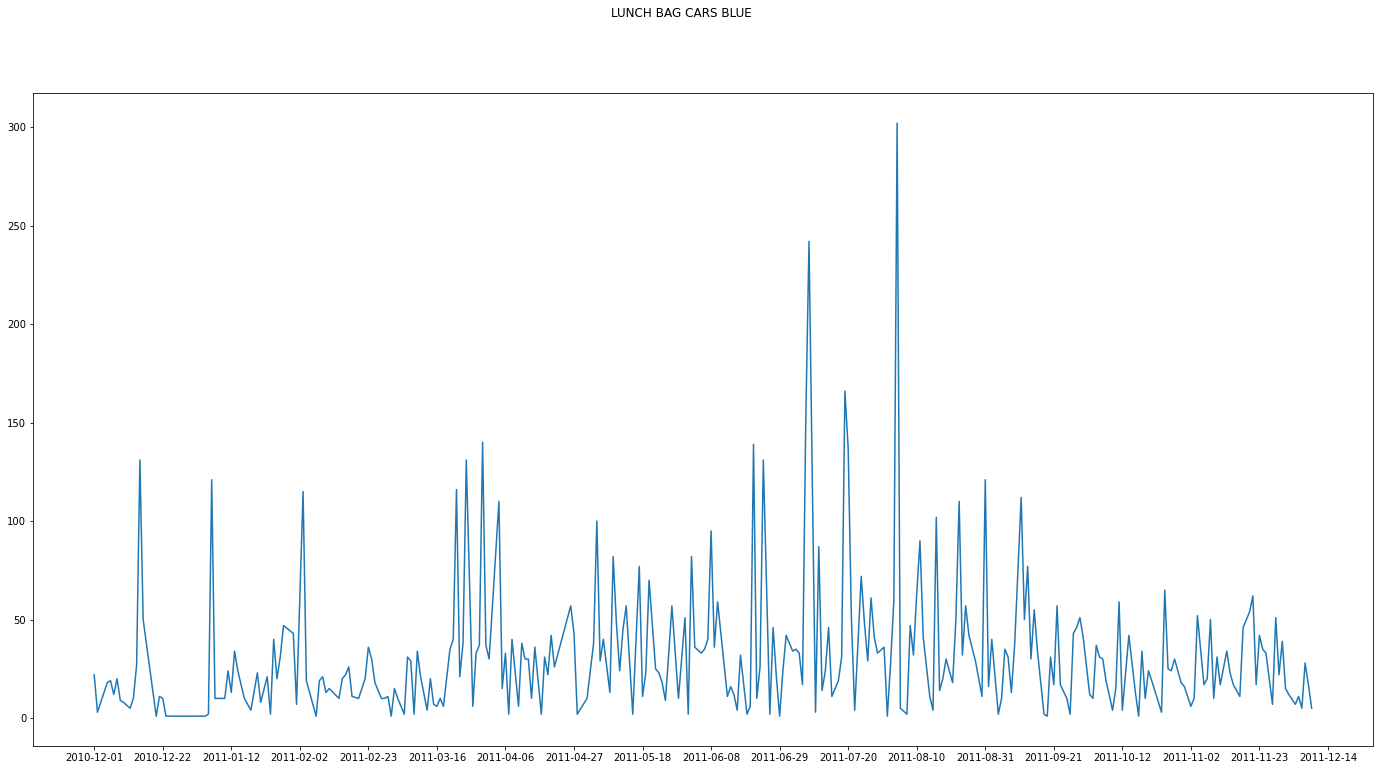

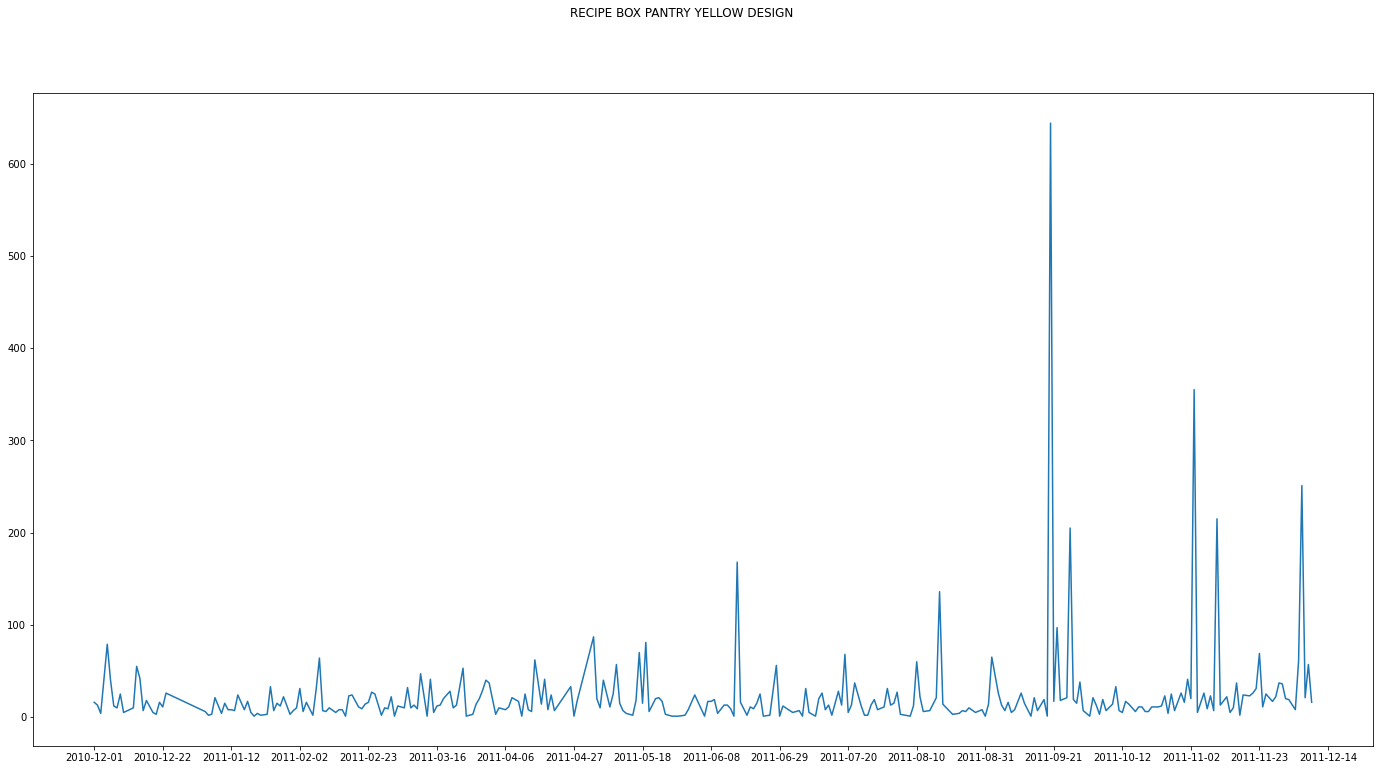

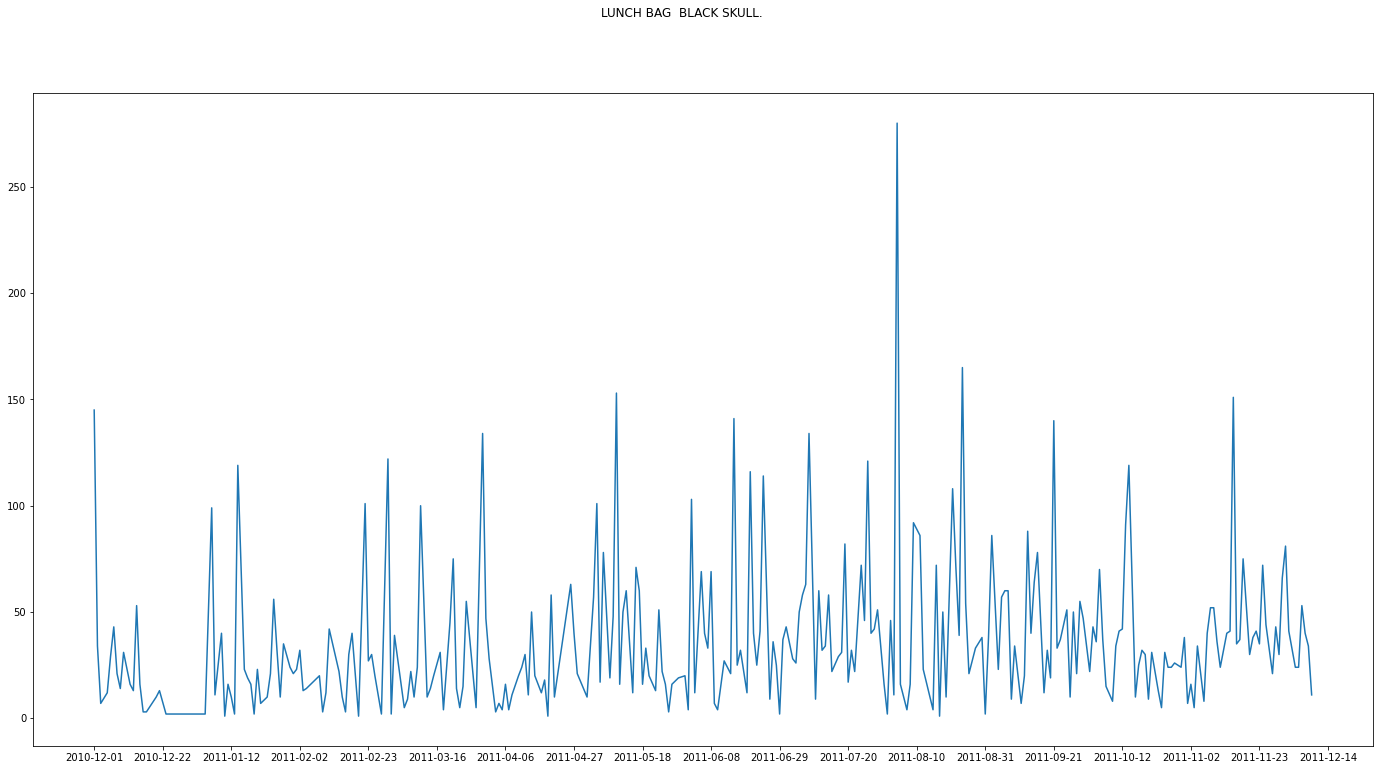

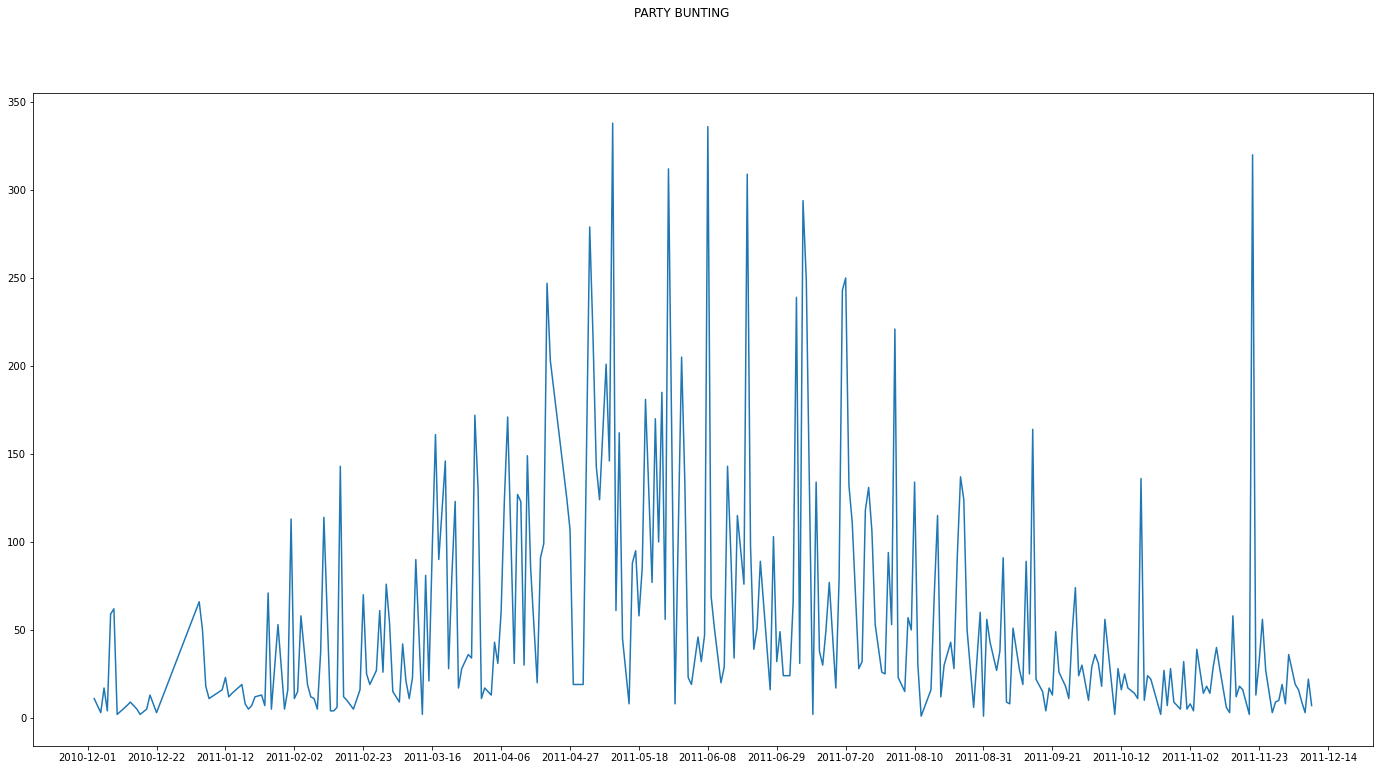

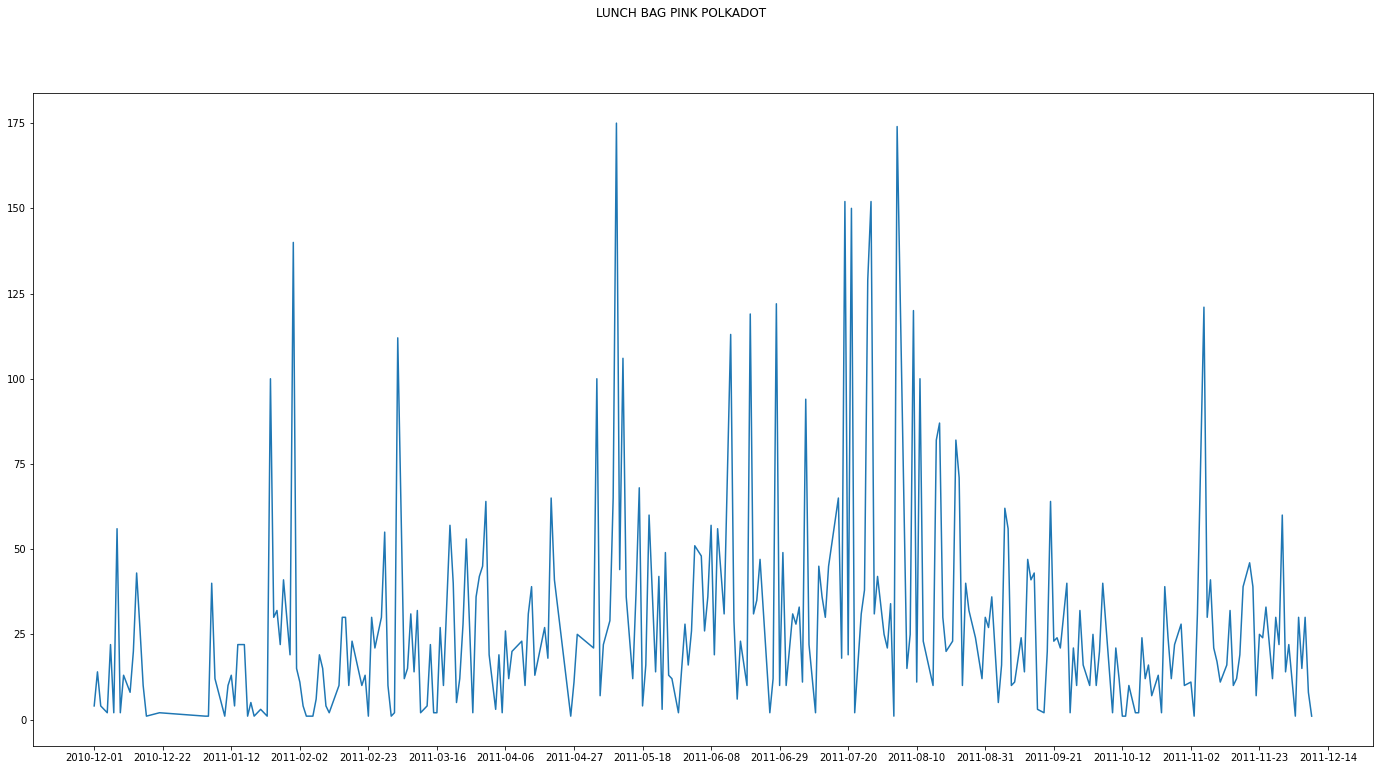

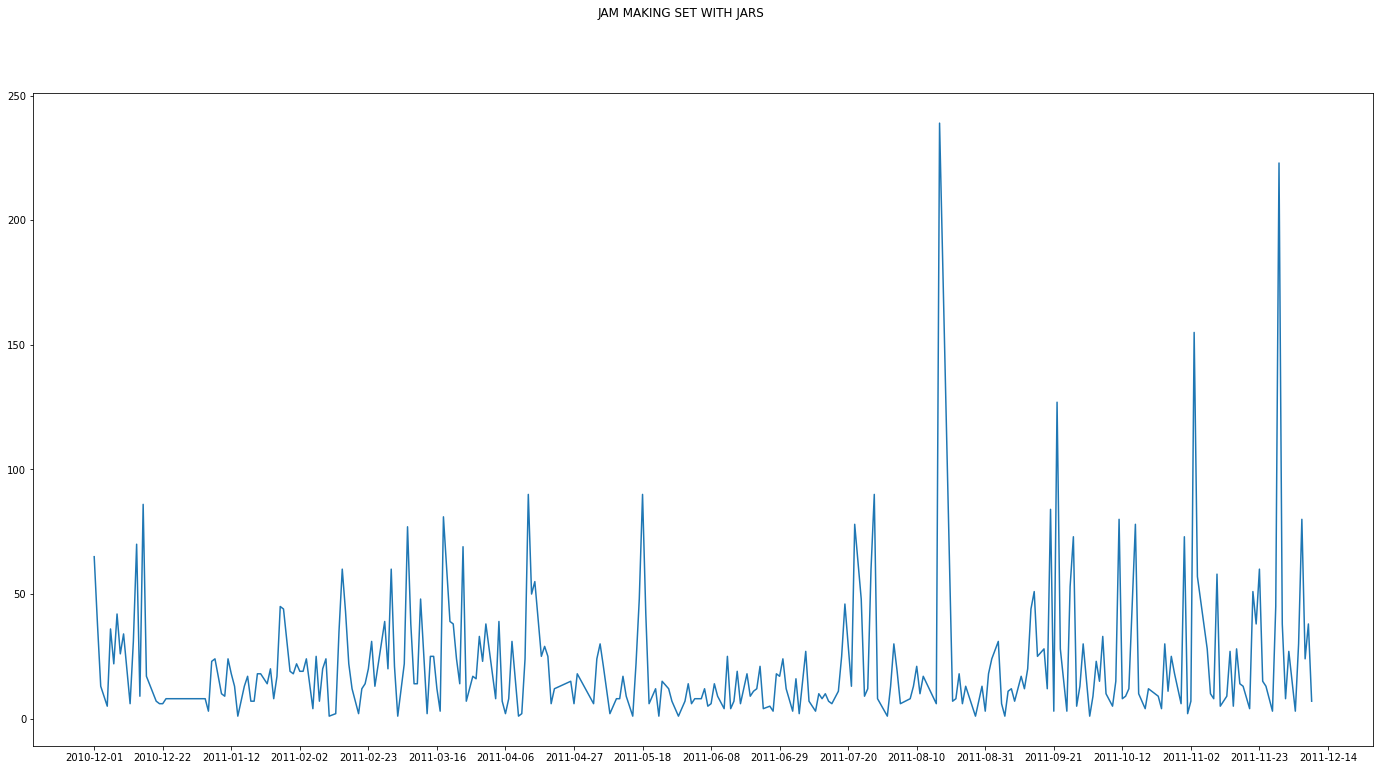

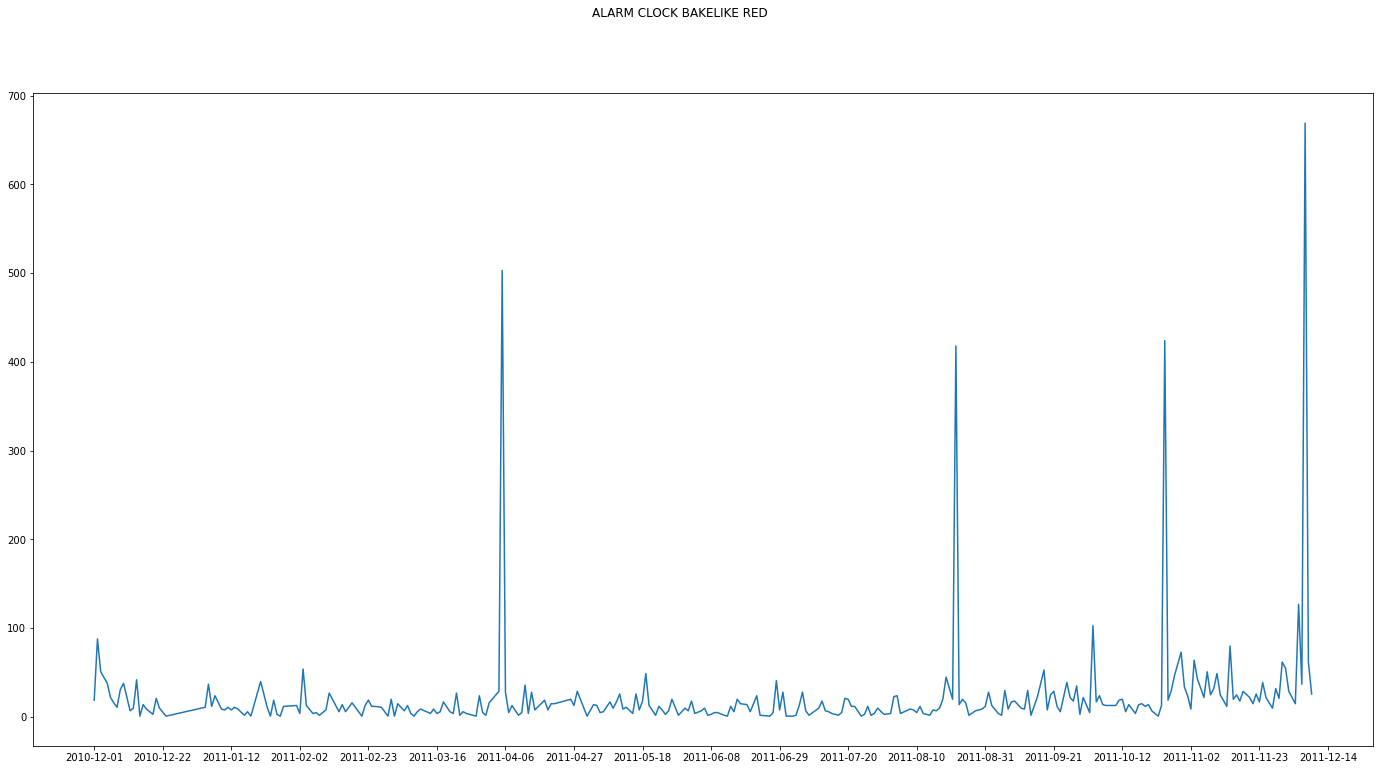

In [21]:
for product in Valid_Products:
    ts = TS_data[TS_data["Description"] == product]
    #display(ts.head(60))
    plt.figure(figsize=(24,12))
    plt.subplot(111)
    plt.plot(ts["Invoice_Date"],ts["Quantity"])
    dates = [datetime.date(2010, 12, 1) + datetime.timedelta(days = i*21) for i in range(19)]
    plt.xticks(dates)
    plt.suptitle(product)
    #print(dates)

In [22]:
total_dates = [datetime.date(2010, 12, 1) + datetime.timedelta(days = i) for i in range(374)]

for product in Valid_Products[-1:]:
    ts_dates = TS_data[TS_data["Description"] == product]["Invoice_Date"]
    missing_dates = set(total_dates) - set(ts_dates)
    missing_dates = sorted(list(missing_dates))
    print(missing_dates)
    print([date.weekday() for date in missing_dates])
    print([missing_dates[i+1] - missing_dates[i] for i in range(len(missing_dates)-1)])

[datetime.date(2010, 12, 4), datetime.date(2010, 12, 11), datetime.date(2010, 12, 18), datetime.date(2010, 12, 22), datetime.date(2010, 12, 24), datetime.date(2010, 12, 25), datetime.date(2010, 12, 26), datetime.date(2010, 12, 27), datetime.date(2010, 12, 28), datetime.date(2010, 12, 29), datetime.date(2010, 12, 30), datetime.date(2010, 12, 31), datetime.date(2011, 1, 1), datetime.date(2011, 1, 2), datetime.date(2011, 1, 3), datetime.date(2011, 1, 8), datetime.date(2011, 1, 15), datetime.date(2011, 1, 19), datetime.date(2011, 1, 22), datetime.date(2011, 1, 29), datetime.date(2011, 1, 30), datetime.date(2011, 1, 31), datetime.date(2011, 2, 5), datetime.date(2011, 2, 9), datetime.date(2011, 2, 12), datetime.date(2011, 2, 13), datetime.date(2011, 2, 19), datetime.date(2011, 2, 26), datetime.date(2011, 3, 5), datetime.date(2011, 3, 12), datetime.date(2011, 3, 13), datetime.date(2011, 3, 19), datetime.date(2011, 3, 26), datetime.date(2011, 4, 2), datetime.date(2011, 4, 3), datetime.date(201

In [23]:
ts_data = np.zeros(2).reshape(-1,1).T
dates = np.array(total_dates)
for product in Valid_Products:
    dt = np.vstack((np.array([product]*374), dates))
    #print(dt.T.shape)
    #print(ts_data.shape)
    ts_data = np.vstack((ts_data, dt.T))
ts_data

array([[0.0, 0.0],
       ['WHITE HANGING HEART T-LIGHT HOLDER', datetime.date(2010, 12, 1)],
       ['WHITE HANGING HEART T-LIGHT HOLDER', datetime.date(2010, 12, 2)],
       ...,
       ['ALARM CLOCK BAKELIKE RED ', datetime.date(2011, 12, 7)],
       ['ALARM CLOCK BAKELIKE RED ', datetime.date(2011, 12, 8)],
       ['ALARM CLOCK BAKELIKE RED ', datetime.date(2011, 12, 9)]],
      dtype=object)

In [24]:
datetime.date(2011, 12, 9) - datetime.date(2010, 12, 1)

datetime.timedelta(days=373)

In [25]:
ts_data.shape

(5611, 2)

In [26]:
ts_data = ts_data[1:,:]
ts_data

array([['WHITE HANGING HEART T-LIGHT HOLDER', datetime.date(2010, 12, 1)],
       ['WHITE HANGING HEART T-LIGHT HOLDER', datetime.date(2010, 12, 2)],
       ['WHITE HANGING HEART T-LIGHT HOLDER', datetime.date(2010, 12, 3)],
       ...,
       ['ALARM CLOCK BAKELIKE RED ', datetime.date(2011, 12, 7)],
       ['ALARM CLOCK BAKELIKE RED ', datetime.date(2011, 12, 8)],
       ['ALARM CLOCK BAKELIKE RED ', datetime.date(2011, 12, 9)]],
      dtype=object)

In [27]:
df = pd.DataFrame(ts_data, columns= ["Description", "Dates"])
df

Description       Dates
0     WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01
1     WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02
2     WHITE HANGING HEART T-LIGHT HOLDER  2010-12-03
3     WHITE HANGING HEART T-LIGHT HOLDER  2010-12-04
4     WHITE HANGING HEART T-LIGHT HOLDER  2010-12-05
...                                  ...         ...
5605           ALARM CLOCK BAKELIKE RED   2011-12-05
5606           ALARM CLOCK BAKELIKE RED   2011-12-06
5607           ALARM CLOCK BAKELIKE RED   2011-12-07
5608           ALARM CLOCK BAKELIKE RED   2011-12-08
5609           ALARM CLOCK BAKELIKE RED   2011-12-09

[5610 rows x 2 columns]

In [28]:
final = df.merge(Valid_data, how="left", left_on=["Description","Dates"], right_on = ["Description","Invoice_Date"])

In [29]:
final["Quantity"] = final["Quantity"].fillna(0)

In [30]:
final[np.isnan(final["UnitPrice"])]

Description       Dates InvoiceNo StockCode  \
44     WHITE HANGING HEART T-LIGHT HOLDER  2010-12-04       NaN       NaN   
133    WHITE HANGING HEART T-LIGHT HOLDER  2010-12-11       NaN       NaN   
209    WHITE HANGING HEART T-LIGHT HOLDER  2010-12-18       NaN       NaN   
233    WHITE HANGING HEART T-LIGHT HOLDER  2010-12-24       NaN       NaN   
234    WHITE HANGING HEART T-LIGHT HOLDER  2010-12-25       NaN       NaN   
...                                   ...         ...       ...       ...   
21254           ALARM CLOCK BAKELIKE RED   2011-11-05       NaN       NaN   
21292           ALARM CLOCK BAKELIKE RED   2011-11-12       NaN       NaN   
21323           ALARM CLOCK BAKELIKE RED   2011-11-19       NaN       NaN   
21361           ALARM CLOCK BAKELIKE RED   2011-11-26       NaN       NaN   
21399           ALARM CLOCK BAKELIKE RED   2011-12-03       NaN       NaN   

       Quantity InvoiceDate  UnitPrice  CustomerID Country Invoice_Date  
44          0.0         NaT        NaN         NaN     NaN          NaN  
133         0.0         NaT        NaN         NaN     NaN          NaN  
209         0.0         NaT        NaN         NaN     NaN          NaN  
233         0.0         NaT        NaN         NaN     NaN          NaN  
234         0.0         NaT        NaN         NaN     NaN          NaN  
...         ...         ...        ...         ...     ...          ...  
21254       0.0         NaT        NaN         NaN     NaN          NaN  
21292       0.0         NaT        NaN         NaN     NaN          NaN  
21323       0.0         NaT        NaN         NaN     NaN          NaN  
21361       0.0         NaT        NaN         NaN     NaN          NaN  
21399       0.0         NaT        NaN         NaN     NaN          NaN  

[1193 rows x 10 columns]

In [31]:
final.head(60)

Description       Dates InvoiceNo StockCode  \
0   WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536365    85123A   
1   WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536373    85123A   
2   WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536375    85123A   
3   WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536390    85123A   
4   WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536394    85123A   
5   WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536396    85123A   
6   WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536401    85123A   
7   WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536406    85123A   
8   WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536502    85123A   
9   WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536520    85123A   
10  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536542    85123A   
11  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536544    85123A   
12  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536575    85123A   
13  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536576    85123A   
14  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536590    85123A   
15  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536592    85123A   
16  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-01    536594    85123A   
17  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536600    85123A   
18  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536602    85123A   
19  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536607    85123A   
20  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536609    85123A   
21  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536612    85123A   
22  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536628    85123A   
23  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536630    85123A   
24  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536685    85123A   
25  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536690    85123A   
26  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536749    85123A   
27  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536750    85123A   
28  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536752    85123A   
29  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536763    85123A   
30  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536787    85123A   
31  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536790    85123A   
32  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536795    85123A   
33  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536824    85123A   
34  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536833    85123A   
35  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-02    536837    85123A   
36  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-03    536857    85123A   
37  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-03    536859    85123A   
38  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-03    536863    85123A   
39  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-03    536876    85123A   
40  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-03    536976    85123A   
41  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-03    536982    85123a   
42  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-03    536987    85123A   
43  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-03    536993    85123A   
44  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-04       NaN       NaN   
45  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-05    537044    85123A   
46  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-05    537046    85123A   
47  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-05    537051    85123A   
48  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-05    537051    85123A   
49  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-05    537054    85123A   
50  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-05    537054    85123A   
51  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-05    537055    85123A   
52  WHITE HANGING HEART T-LIGHT HOLDER  2010-12-05    537126    85123A   
53  WHITE HANGING HEART T-LIGHT

In [32]:
TS_data = final[["Description","Dates","Quantity"]].groupby(["Description","Dates"]).sum("Quantity").reset_index()

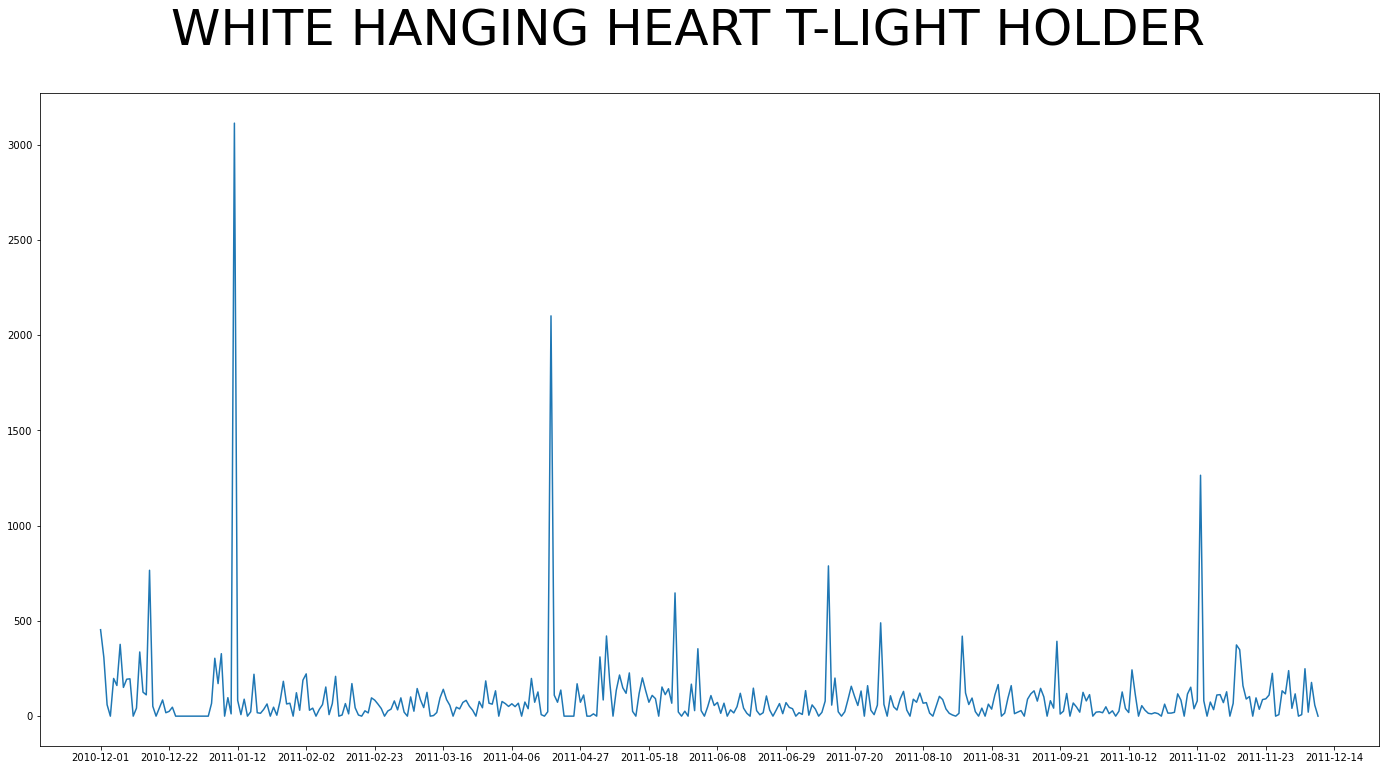

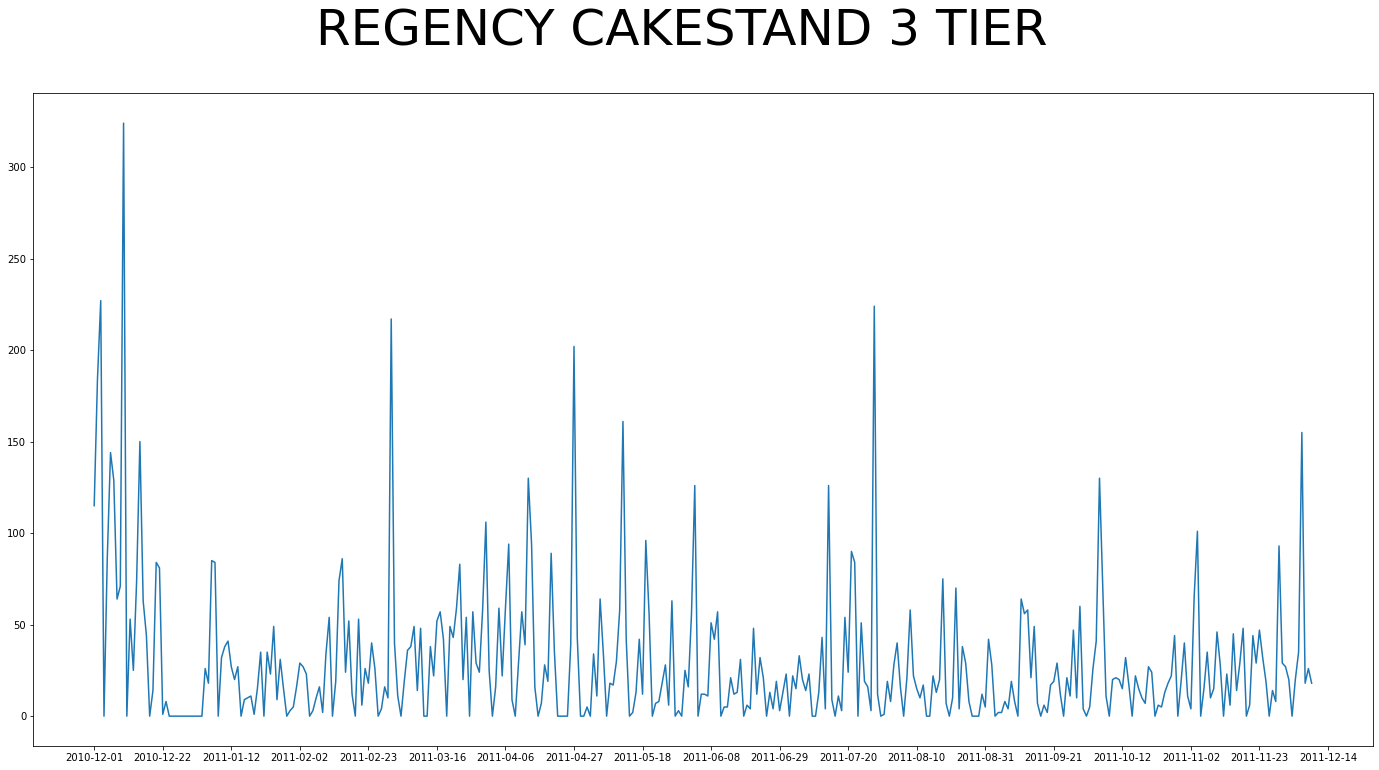

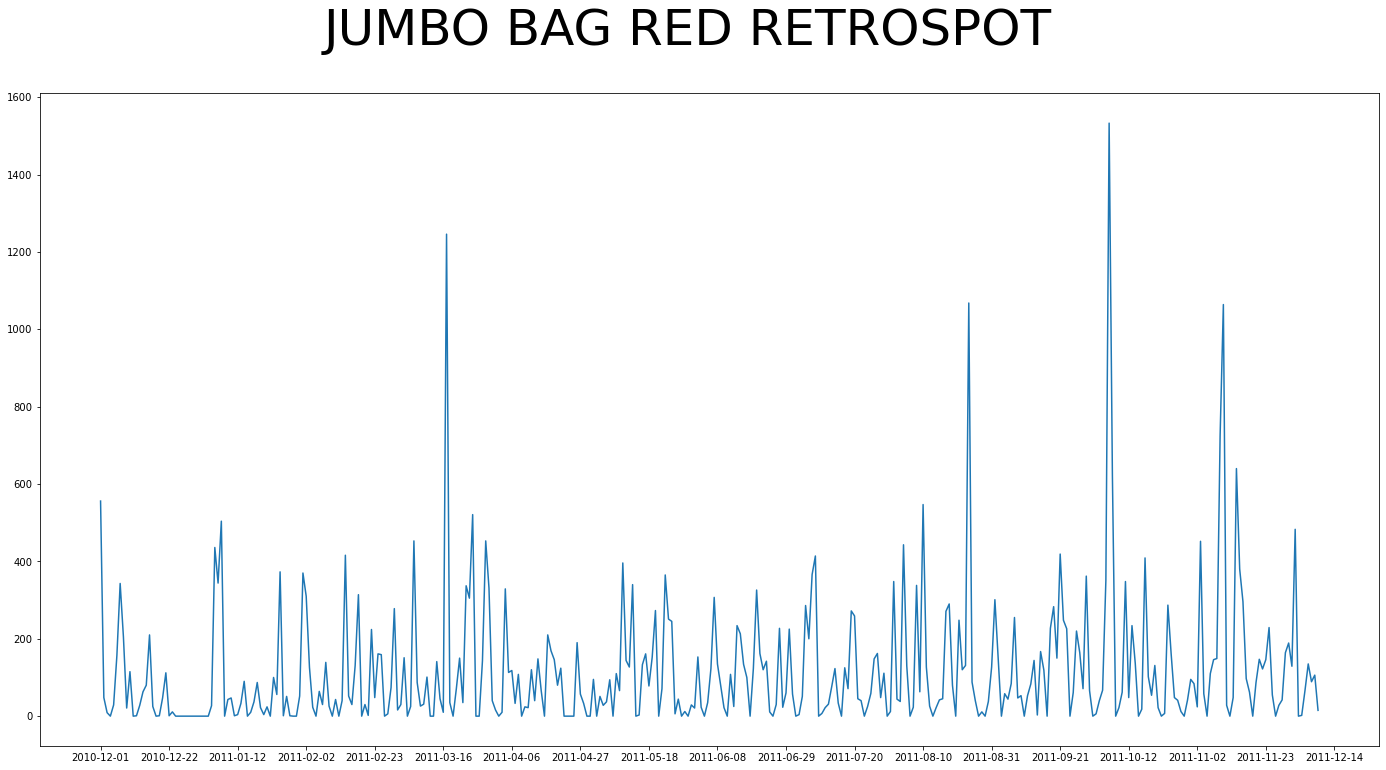

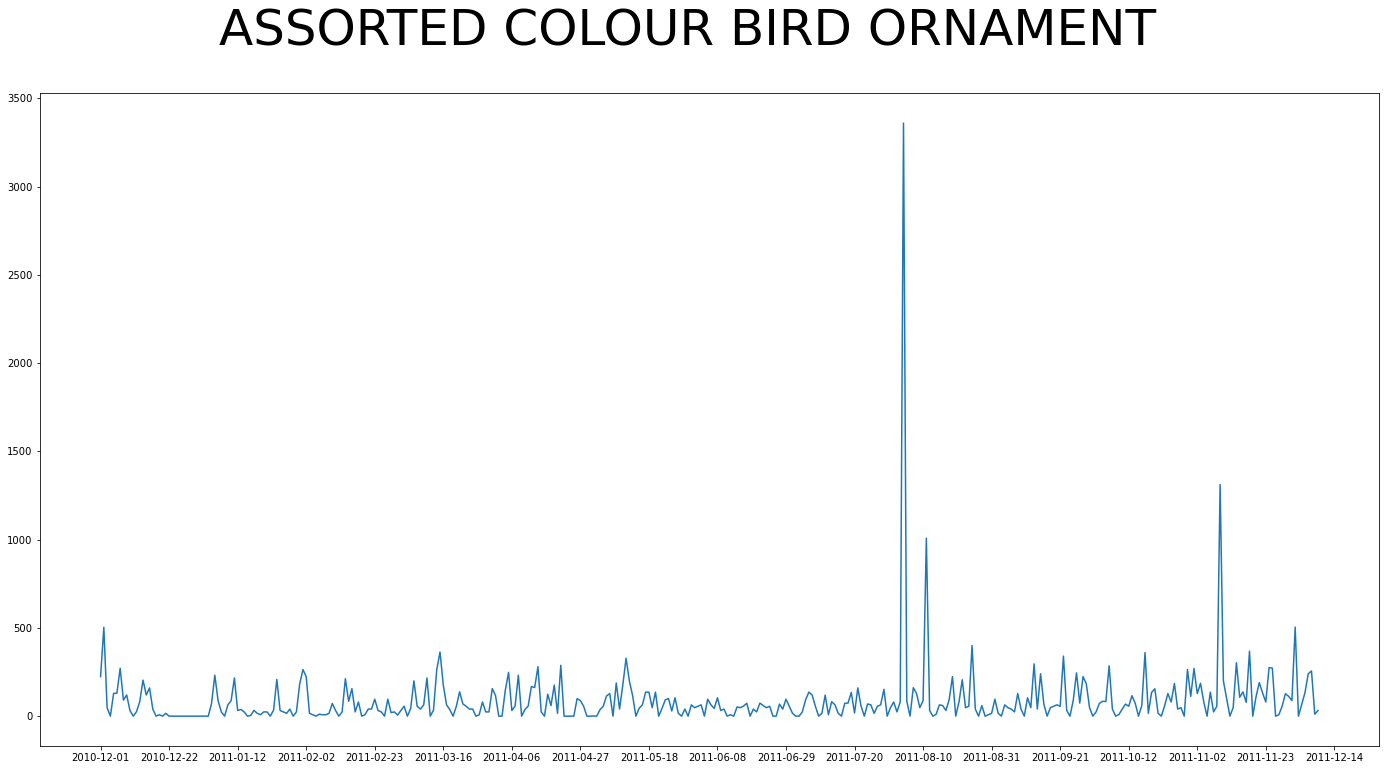

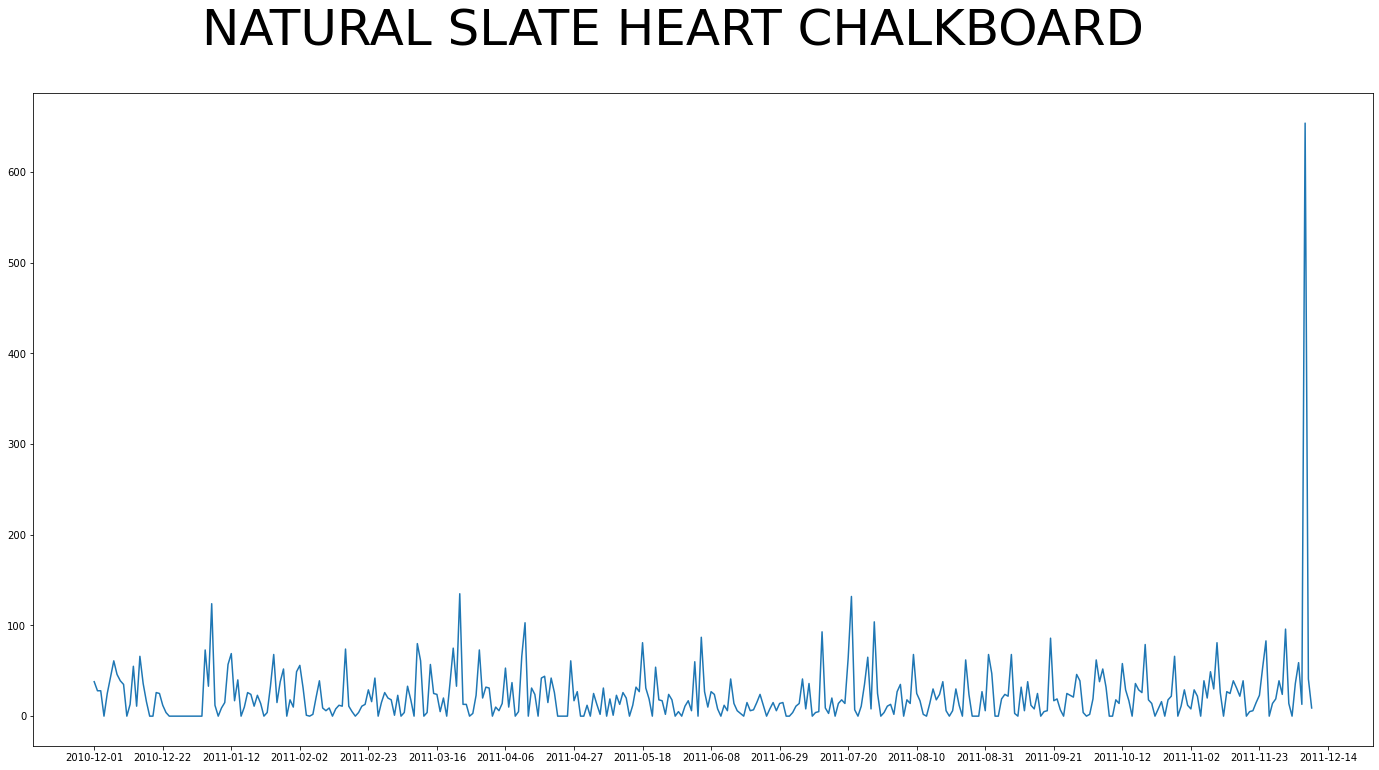

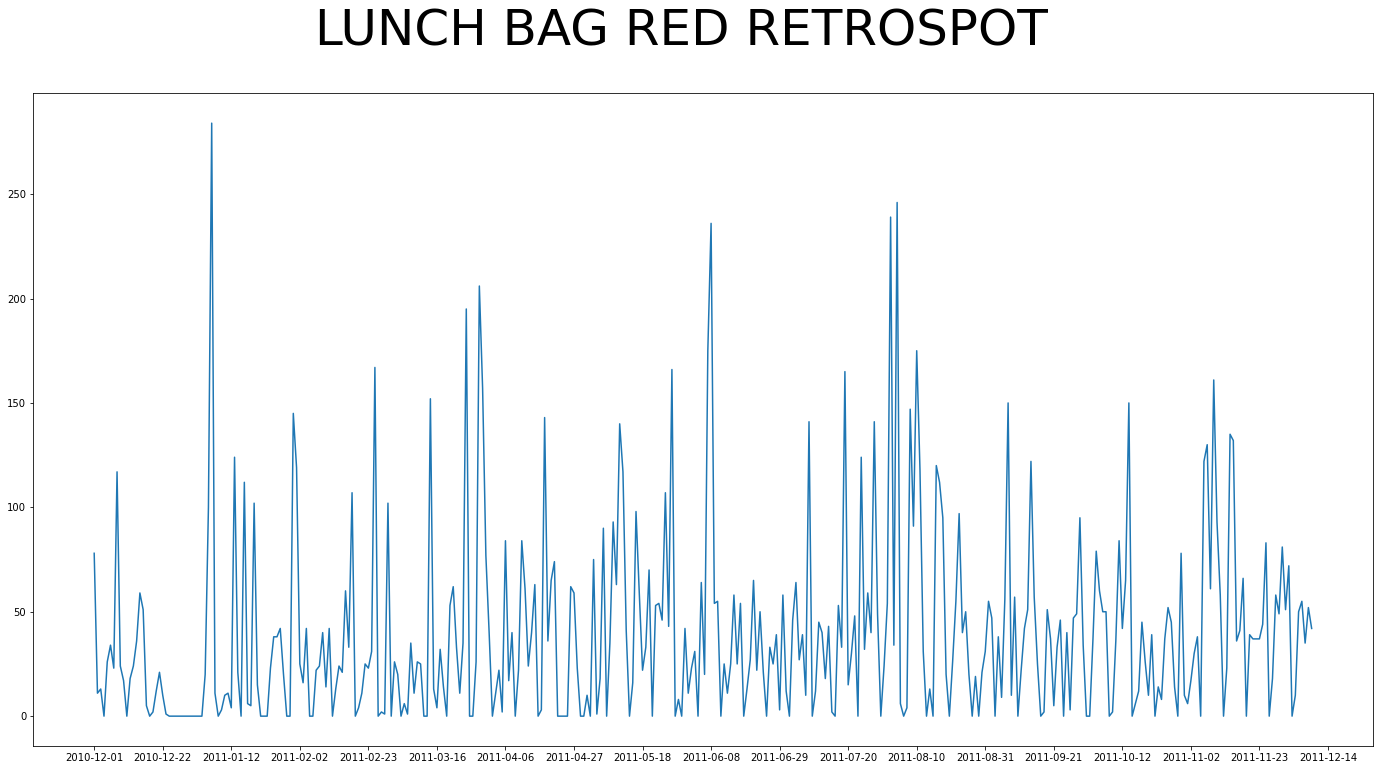

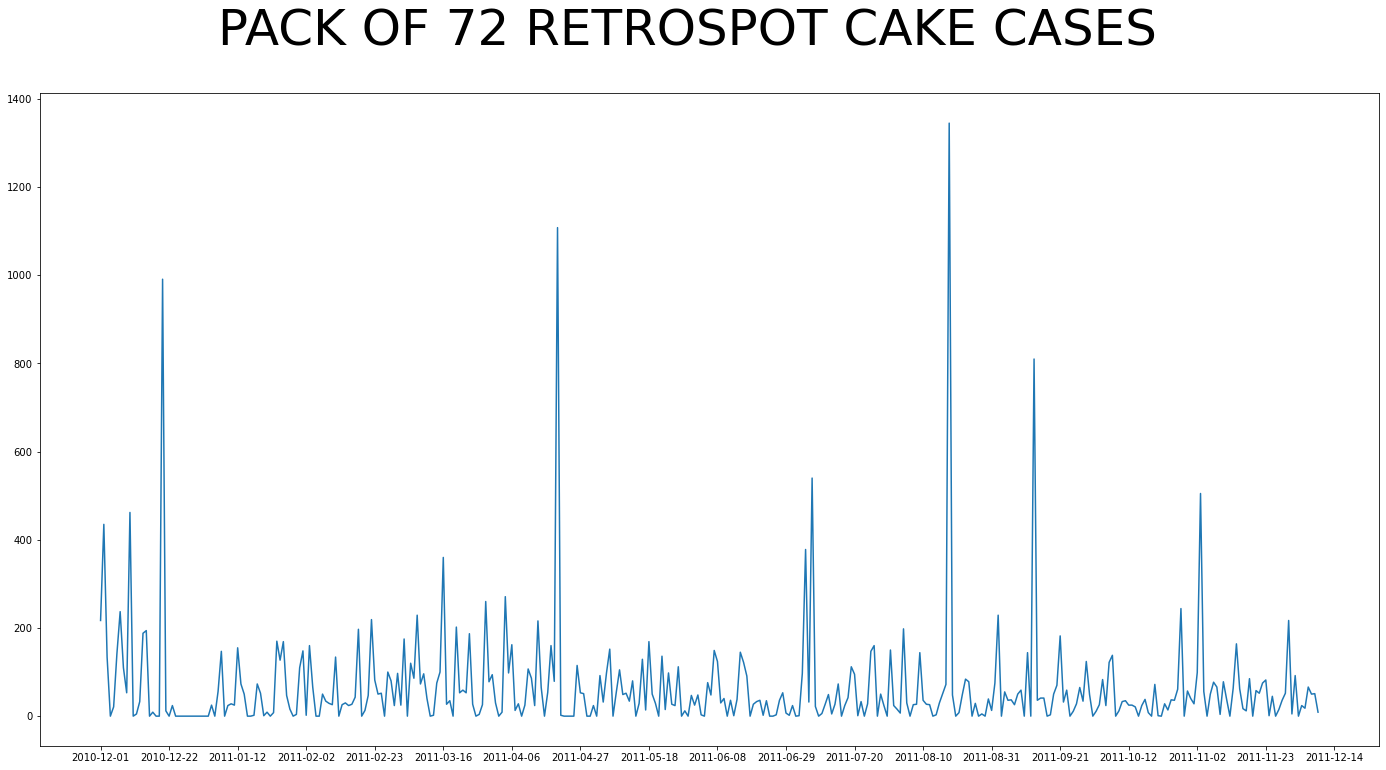

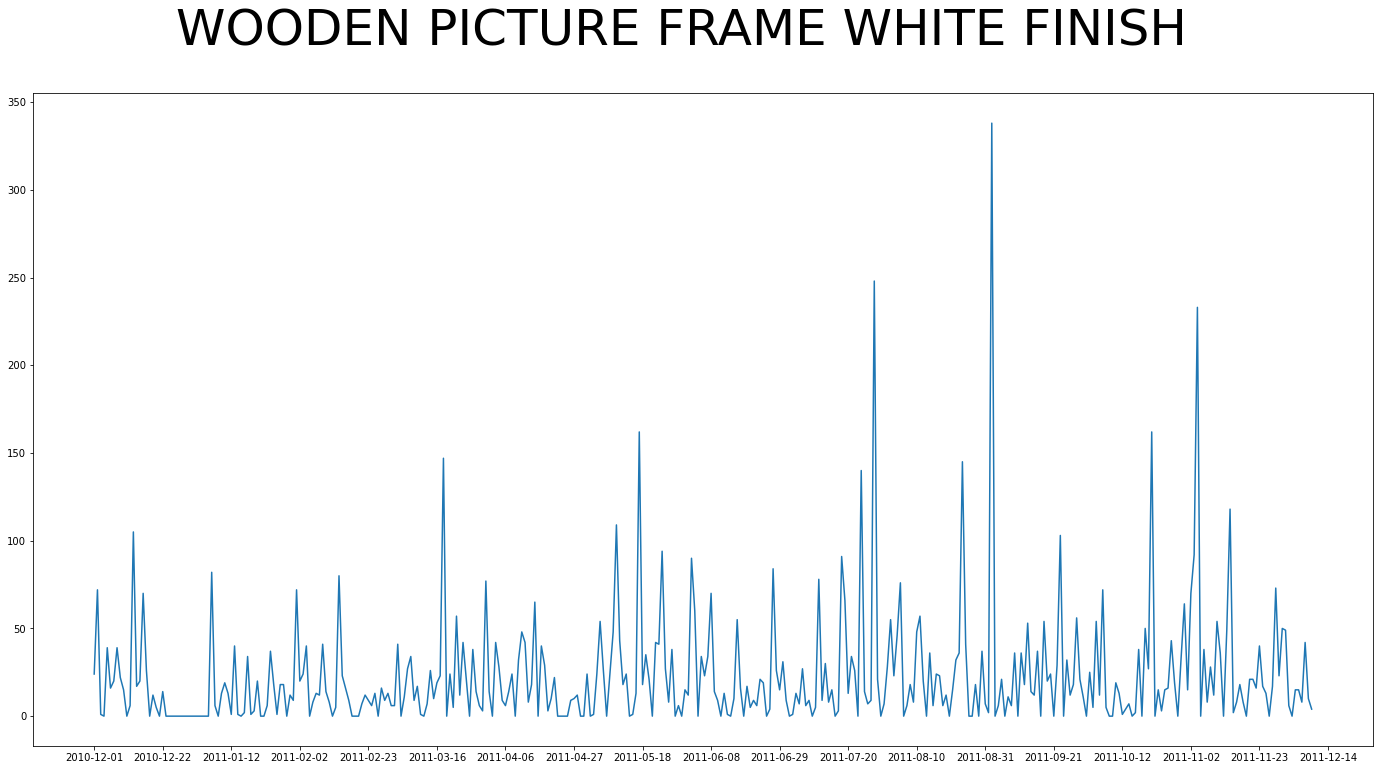

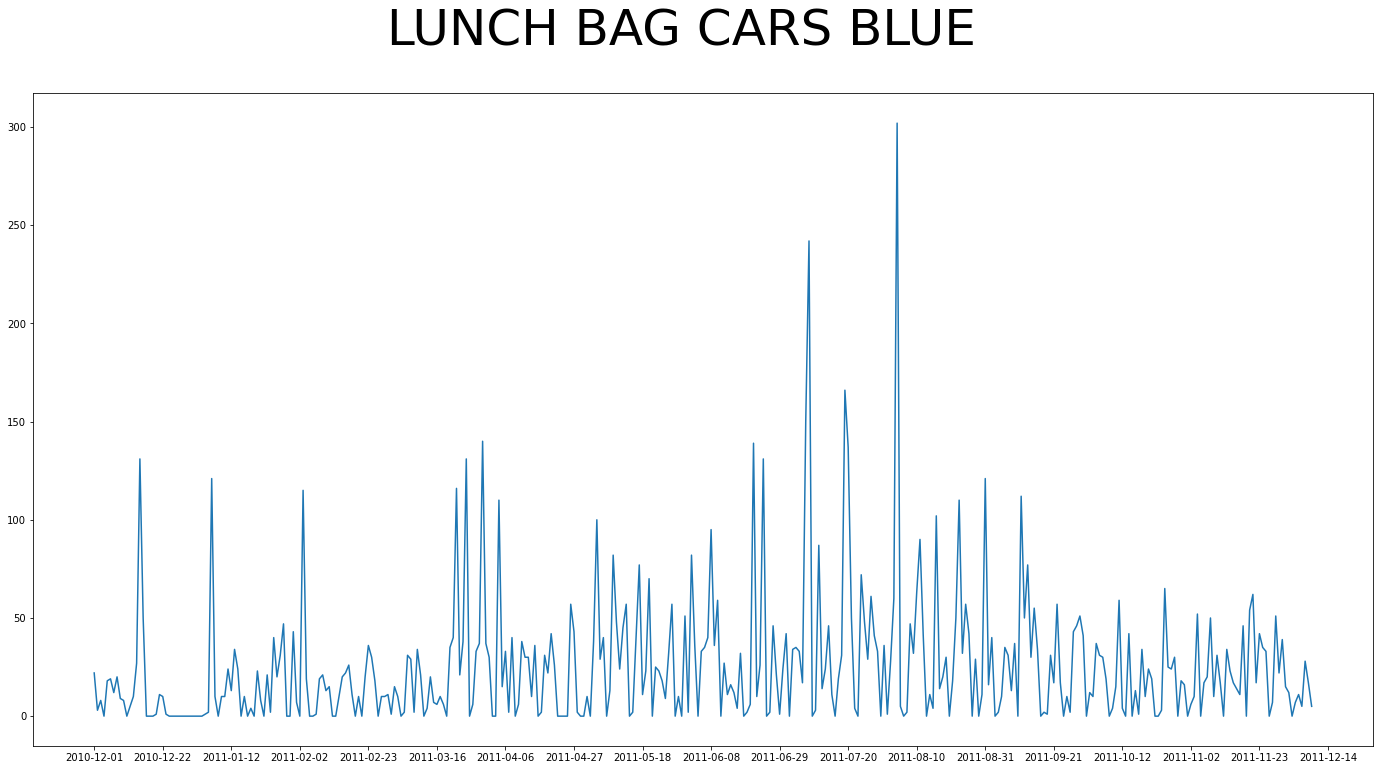

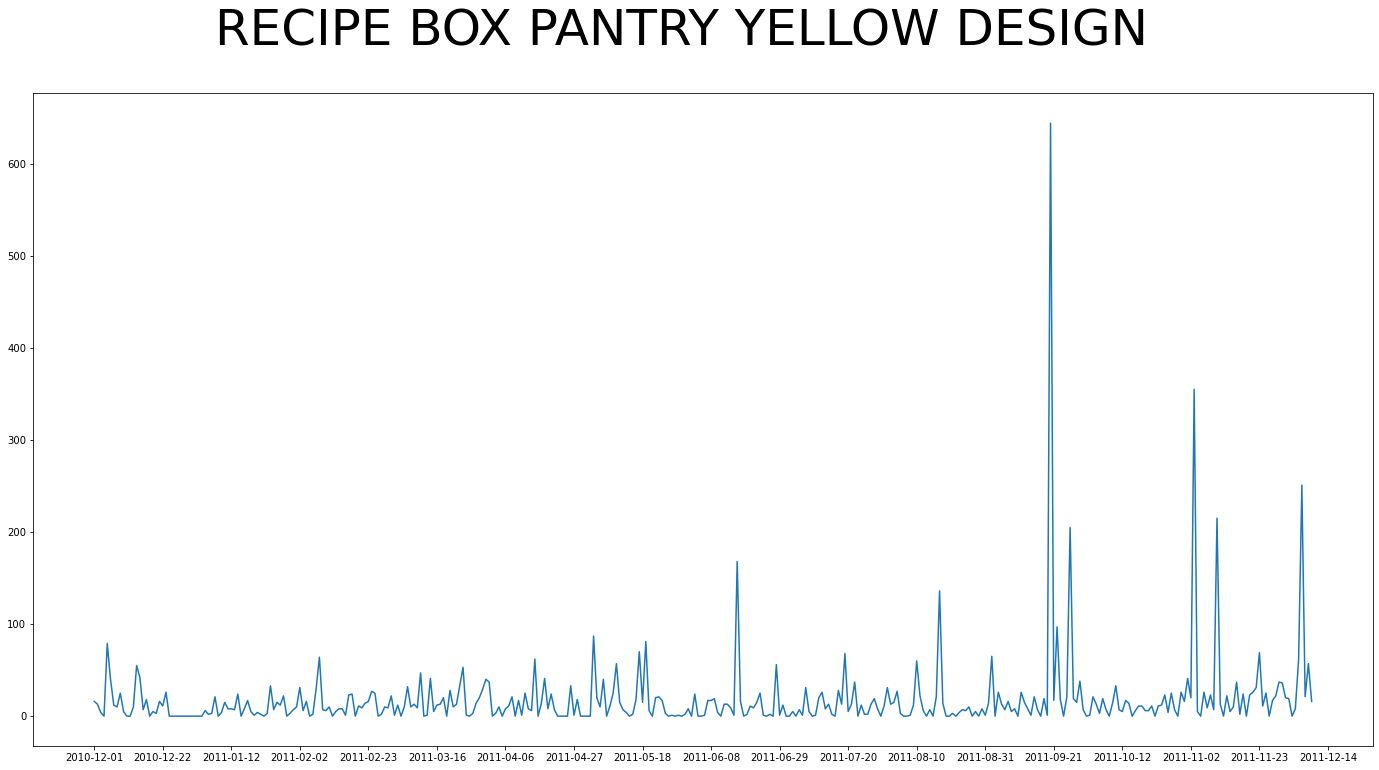

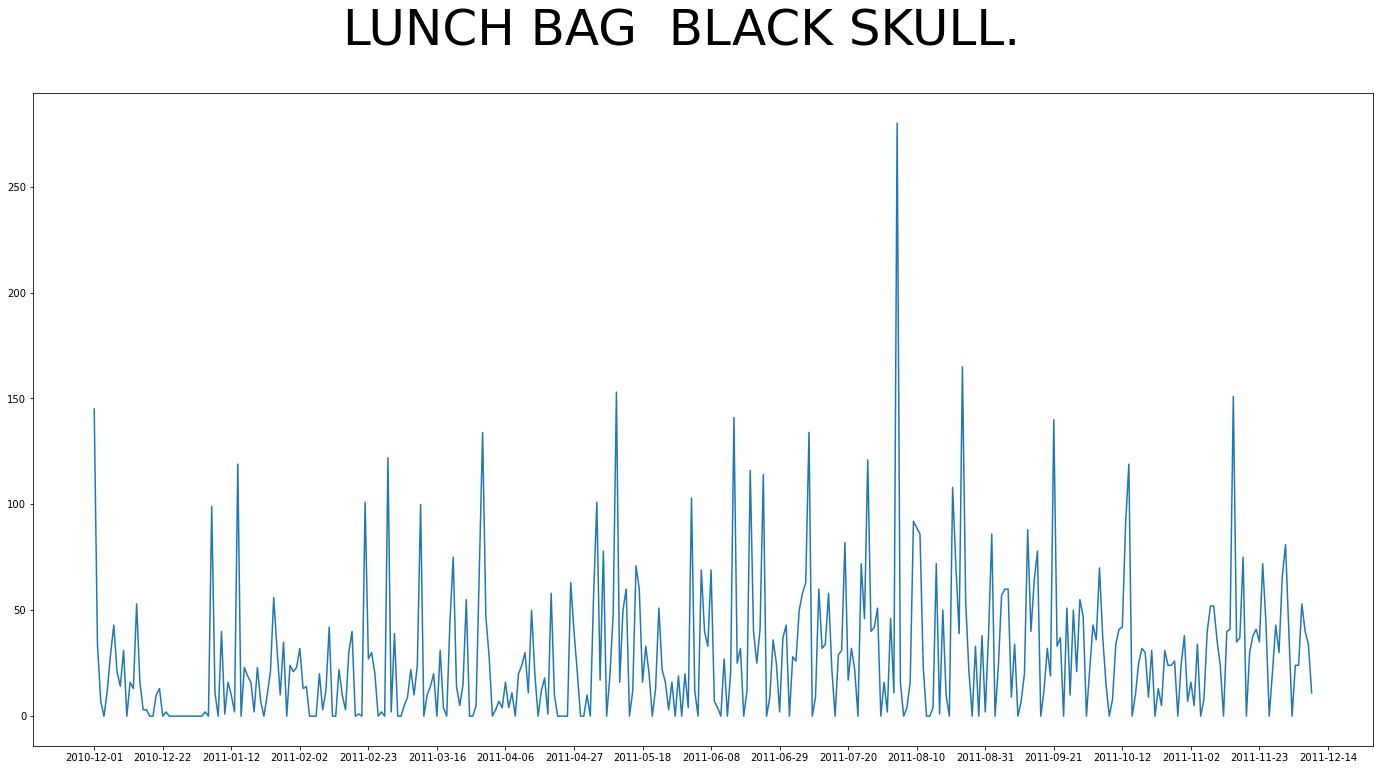

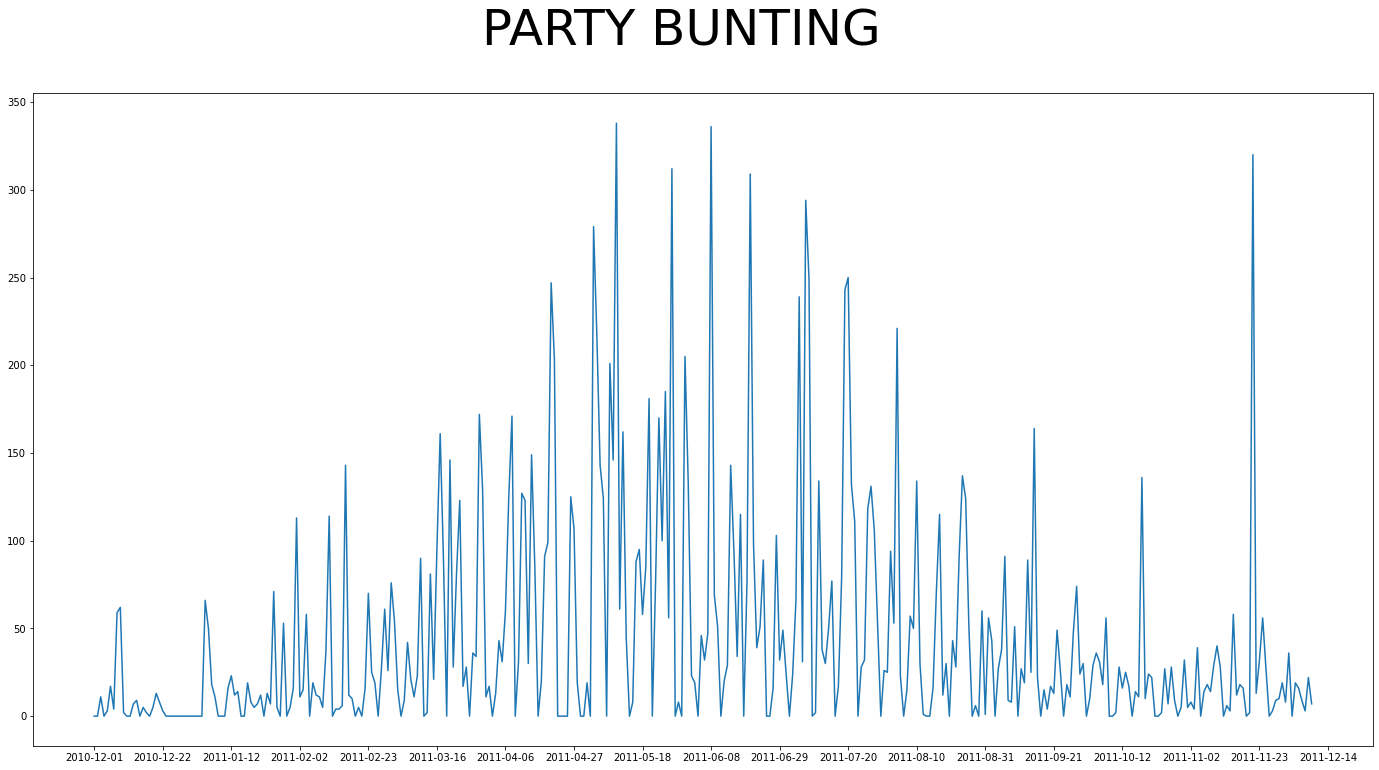

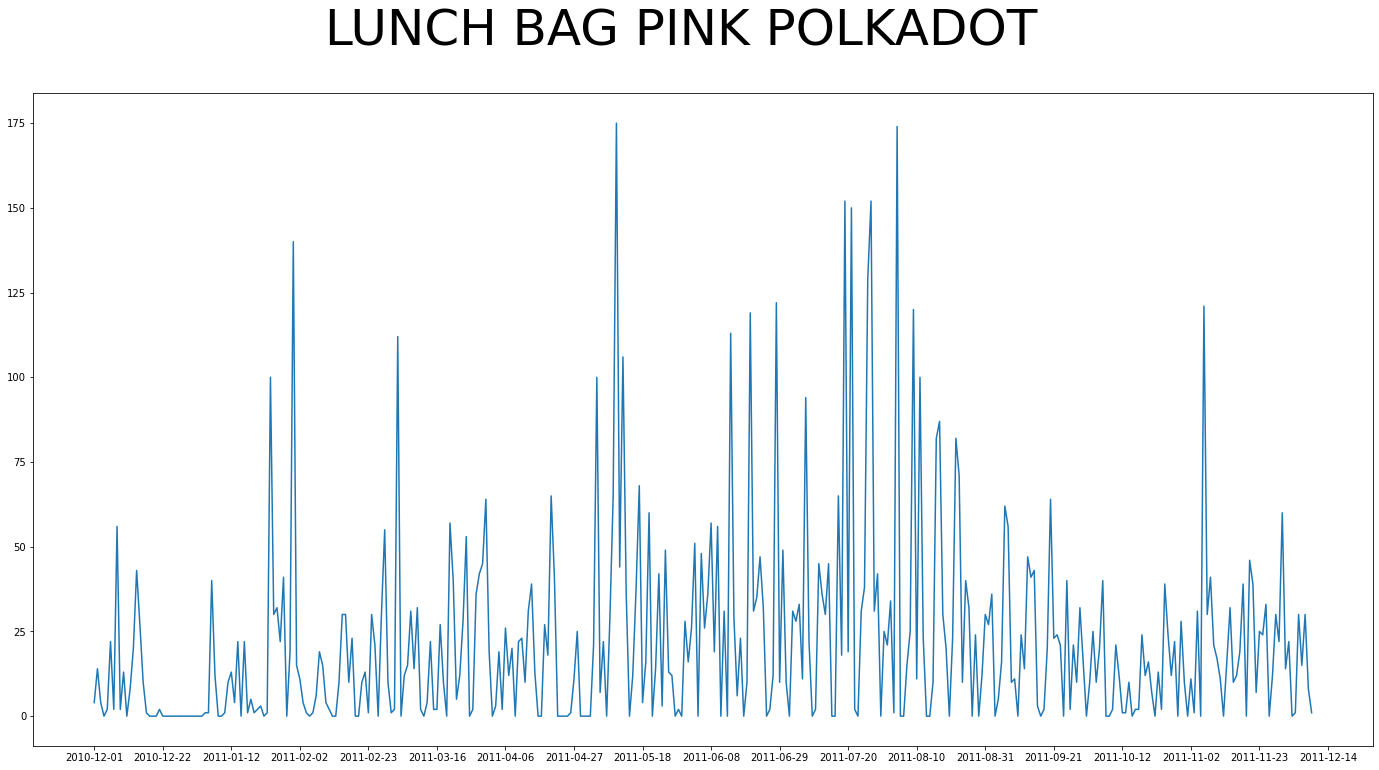

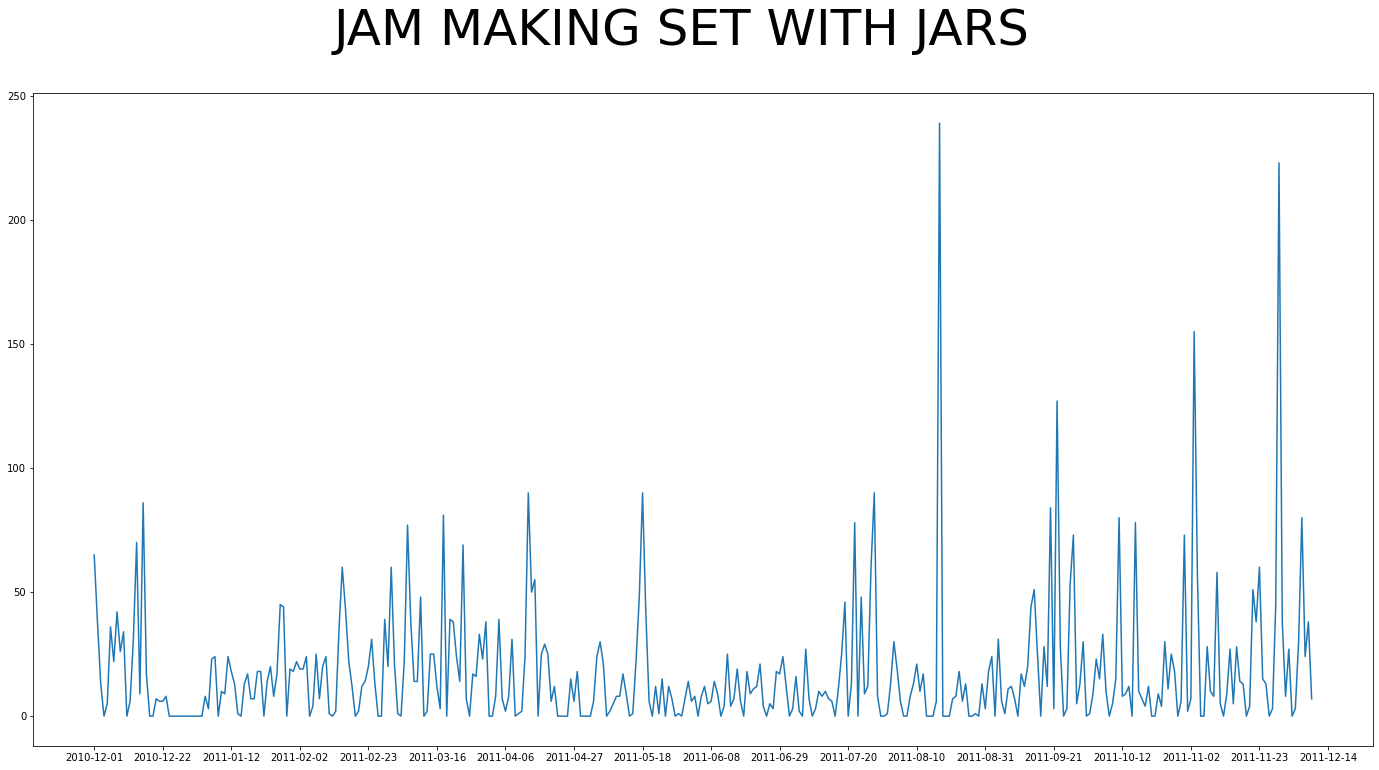

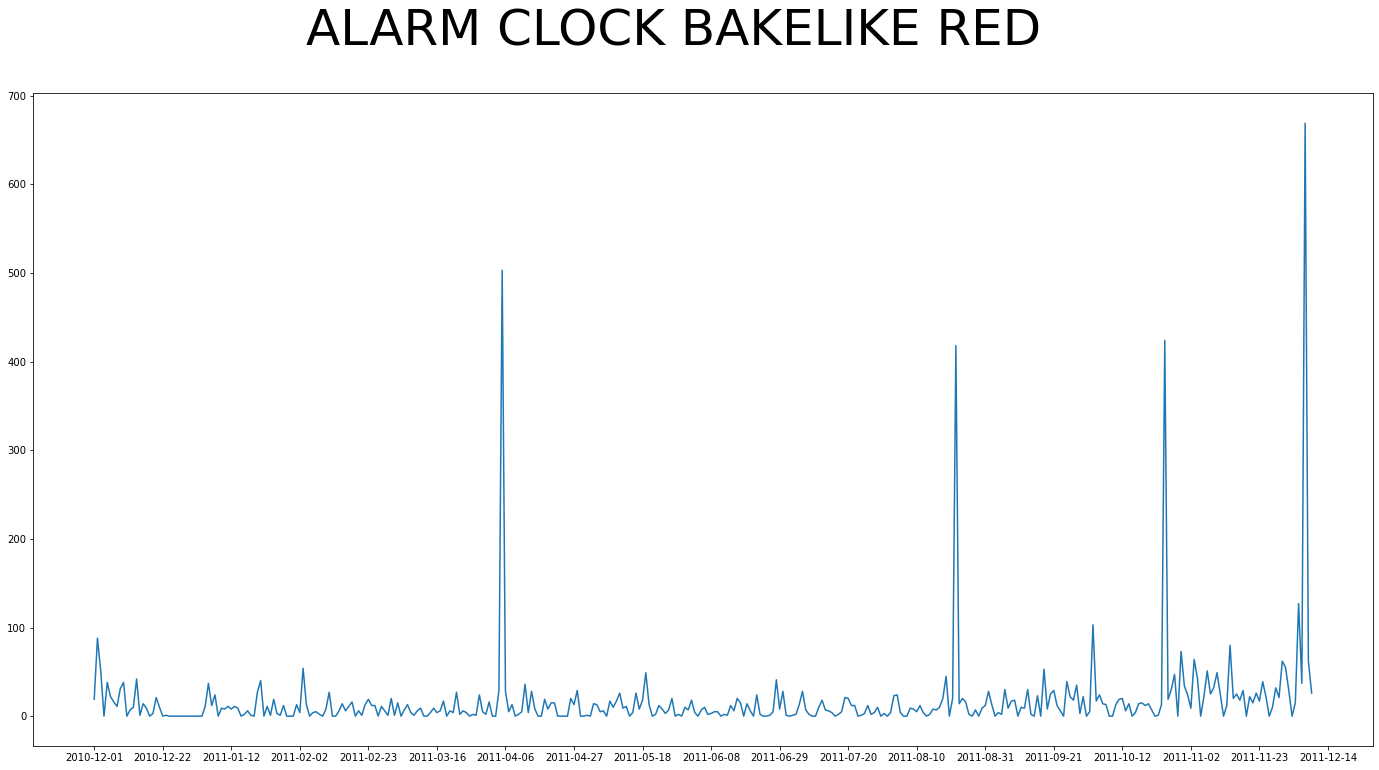

In [33]:
for product in Valid_Products:
    ts = TS_data[TS_data["Description"] == product]
    #display(ts.head(60))
    plt.figure(figsize=(24,12))
    plt.subplot(111)
    plt.plot(ts["Dates"],ts["Quantity"])
    dates = [datetime.date(2010, 12, 1) + datetime.timedelta(days = i*21) for i in range(19)]
    plt.xticks(dates)
    plt.suptitle(product,size = 50)
    #print(dates)

In [34]:
RF_data = final.assign(Total_Price=final.Quantity*final.UnitPrice
                      ).groupby(["Description","Dates"],
                                as_index= False
                               ).agg(Quantity = ('Quantity', np.sum),
                                     Invoice = ('InvoiceNo', pd.Series.nunique),
                                     CustomerID = ('CustomerID', pd.Series.nunique),
                                     Total_Price = ('Total_Price', np.sum))
RF_data

Description       Dates  Quantity  Invoice  \
0             ALARM CLOCK BAKELIKE RED   2010-12-01      19.0        3   
1             ALARM CLOCK BAKELIKE RED   2010-12-02      88.0        6   
2             ALARM CLOCK BAKELIKE RED   2010-12-03      51.0        2   
3             ALARM CLOCK BAKELIKE RED   2010-12-04       0.0        0   
4             ALARM CLOCK BAKELIKE RED   2010-12-05      38.0        7   
...                                 ...         ...       ...      ...   
5605  WOODEN PICTURE FRAME WHITE FINISH  2011-12-05      15.0        6   
5606  WOODEN PICTURE FRAME WHITE FINISH  2011-12-06       8.0        3   
5607  WOODEN PICTURE FRAME WHITE FINISH  2011-12-07      42.0        6   
5608  WOODEN PICTURE FRAME WHITE FINISH  2011-12-08      10.0        3   
5609  WOODEN PICTURE FRAME WHITE FINISH  2011-12-09       4.0        1   

      CustomerID  Total_Price  
0              3        78.99  
1              6       330.00  
2              2       205.41  
3              0         0.00  
4              7       142.50  
...          ...          ...  
5605           4        71.69  
5606           3        26.44  
5607           6       131.94  
5608           3        35.53  
5609           1        19.84  

[5610 rows x 6 columns]

In [35]:
RF_data["Relative_UnitPrice"] = RF_data["Total_Price"] / RF_data["Quantity"]

In [36]:
#RF_data.drop(columns="Total_Price",inplace=True)

In [37]:
RF_data["Relative_UnitPrice"] = RF_data["Relative_UnitPrice"].fillna(0)
RF_data

Description       Dates  Quantity  Invoice  \
0             ALARM CLOCK BAKELIKE RED   2010-12-01      19.0        3   
1             ALARM CLOCK BAKELIKE RED   2010-12-02      88.0        6   
2             ALARM CLOCK BAKELIKE RED   2010-12-03      51.0        2   
3             ALARM CLOCK BAKELIKE RED   2010-12-04       0.0        0   
4             ALARM CLOCK BAKELIKE RED   2010-12-05      38.0        7   
...                                 ...         ...       ...      ...   
5605  WOODEN PICTURE FRAME WHITE FINISH  2011-12-05      15.0        6   
5606  WOODEN PICTURE FRAME WHITE FINISH  2011-12-06       8.0        3   
5607  WOODEN PICTURE FRAME WHITE FINISH  2011-12-07      42.0        6   
5608  WOODEN PICTURE FRAME WHITE FINISH  2011-12-08      10.0        3   
5609  WOODEN PICTURE FRAME WHITE FINISH  2011-12-09       4.0        1   

      CustomerID  Total_Price  Relative_UnitPrice  
0              3        78.99            4.157368  
1              6       330.00            3.750000  
2              2       205.41            4.027647  
3              0         0.00            0.000000  
4              7       142.50            3.750000  
...          ...          ...                 ...  
5605           4        71.69            4.779333  
5606           3        26.44            3.305000  
5607           6       131.94            3.141429  
5608           3        35.53            3.553000  
5609           1        19.84            4.960000  

[5610 rows x 7 columns]

In [38]:
TS_data.to_csv("TS_data.csv")
RF_data.to_csv("RF_data.csv")